# Exploratory Data Analysis: Political Leaders on Youtube

In [3]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import mstats
import pylab
import re

### Metrics Engagemnet

In [ ]:
#Likes-to-Views
df['LikestoViews']= df['Likes']/df['Views']

#Comments-to-Views
df['CommentstoViews']= df['Comments']/df['Views']

#Dislikes-to-Views
df['DislikestoViews']= df['Dislikes']/df['Views']

### Combined Metrics

In [ ]:
#Combined Metric that takes into account views, likes, comments, and dislikes to identify the top-performing videos,
#where weights are assigned based on the importance you give to each metric.

df['Combined_Metric']= (0.45 * df['Views'])+(0.25 * df['Likes'])+(0.2 * df['Comments'])-(0.1 * df['Dislikes'])

### Channels EDA

In [2]:
channels = pd.read_csv('channelData.csv')

In [3]:
channels

Unnamed: 0                         Channel_name  \
0           0                   Plefsi Eleftherias   
1           1                  Kyriakos Mitsotakis   
2           2                  Stefanos Kasselakis   
3           3           Spartiates (Official Page)   
4           4                 Alexandros Charitsis   
5           5                                 NIKI   
6           6          Kommounistiko Komma Elladas   
7           7  Elliniki Lysi - Kyriakos Velopoulos   
8           8                    Nikos Androulakis   

                                         Description  Subscribers  ViewCount  \
0                     Θέλεις να είσαι ΕΣΥ στη Βουλή;         6060    1109027   
1  Το προσωπικό κανάλι του Προέδρου της Νέας Δημο...        20900    7896679   
2  Πρόεδρος του ΣΥΡΙΖΑ - Προοδευτική Συμμαχία\nPr...         5350     775992   
3  Το επίσημο κανάλι του κόμματος «ΣΠΑΡΤΙΑΤΕΣ» στ...         5610     143189   
4  Επίσημος λογαριασμός ενημέρωσης για το έργο κα...          645     142499   
5  Ούτε αριστερά, ούτε δεξιά – αλλά μπροστά. Σεβό...        11600    2924458   
6                                                NaN        16400    9645148   
7  Το επίσημο κανάλι της Ελληνικής Λύσης - Κυριάκ...        43200   25387010   
8                                                 \n         5180    3112532   

   Total_Videos               Playlist_id  ViewtoSubscriber  
0           931  UU8dsz9dtUvIf7HqP5jrC_Jw        183.007756  
1           859  UUiFpwKZAaXxGGE-mrQ1-QMA        377.831531  
2            67  UUQRkc4_IZv27CyYw2tdAi9A        145.045234  
3           419  UU93M_NummpHjSqd5MngCLhA         25.523886  
4           660  UUzDdvVB843U1XybJiTYVVvg        220.928682  
5           325  UU_wSXkcCtfqvuFcmhGWTBEg        252.108448  
6           355  UUC5GG5tZf0APYlBbzup9J9A        588.118780  
7          2449  UUJkuXSz3IIBir_IkHSyQ-2w        587.662269  
8           352  UUdcyrXU9tbhpYzu2ZFL0cCA        600.874903

In [4]:
channels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        9 non-null      int64  
 1   Channel_name      9 non-null      object 
 2   Description       8 non-null      object 
 3   Subscribers       9 non-null      int64  
 4   ViewCount         9 non-null      int64  
 5   Total_Videos      9 non-null      int64  
 6   Playlist_id       9 non-null      object 
 7   ViewtoSubscriber  9 non-null      float64
dtypes: float64(1), int64(4), object(3)
memory usage: 708.0+ bytes


In [4]:
#View-to-Subscriber Ratio
channels['ViewtoSubscriber'] = channels['ViewCount']/channels['Subscribers']

In [6]:
channels['ViewtoSubscriber'] = channels['ViewtoSubscriber'].round(2)

In [7]:
channels.sort_values(by='ViewtoSubscriber', ascending=False).head(3)

Unnamed: 0                         Channel_name  \
8           8                    Nikos Androulakis   
6           6          Kommounistiko Komma Elladas   
7           7  Elliniki Lysi - Kyriakos Velopoulos   

                                         Description  Subscribers  ViewCount  \
8                                                 \n         5180    3112532   
6                                                NaN        16400    9645148   
7  Το επίσημο κανάλι της Ελληνικής Λύσης - Κυριάκ...        43200   25387010   

   Total_Videos               Playlist_id  ViewtoSubscriber  
8           352  UUdcyrXU9tbhpYzu2ZFL0cCA            600.87  
6           355  UUC5GG5tZf0APYlBbzup9J9A            588.12  
7          2449  UUJkuXSz3IIBir_IkHSyQ-2w            587.66

In [10]:
channels.sort_values(by='ViewCount', ascending=False).head(3)

Channel_name  \
7  Elliniki Lysi - Kyriakos Velopoulos   
6          Kommounistiko Komma Elladas   
1                  Kyriakos Mitsotakis   

                                         Description  Subscribers  ViewCount  \
7  Το επίσημο κανάλι της Ελληνικής Λύσης - Κυριάκ...        43200   25387010   
6                                                NaN        16400    9645148   
1  Το προσωπικό κανάλι του Προέδρου της Νέας Δημο...        20900    7896679   

   Total_Videos               Playlist_id  ViewtoSubscriber  
7          2449  UUJkuXSz3IIBir_IkHSyQ-2w            587.66  
6           355  UUC5GG5tZf0APYlBbzup9J9A            588.12  
1           859  UUiFpwKZAaXxGGE-mrQ1-QMA            377.83

In [11]:
channels.sort_values(by='Total_Videos', ascending=False).head(3)

Channel_name  \
7  Elliniki Lysi - Kyriakos Velopoulos   
0                   Plefsi Eleftherias   
1                  Kyriakos Mitsotakis   

                                         Description  Subscribers  ViewCount  \
7  Το επίσημο κανάλι της Ελληνικής Λύσης - Κυριάκ...        43200   25387010   
0                     Θέλεις να είσαι ΕΣΥ στη Βουλή;         6060    1109027   
1  Το προσωπικό κανάλι του Προέδρου της Νέας Δημο...        20900    7896679   

   Total_Videos               Playlist_id  ViewtoSubscriber  
7          2449  UUJkuXSz3IIBir_IkHSyQ-2w            587.66  
0           931  UU8dsz9dtUvIf7HqP5jrC_Jw            183.01  
1           859  UUiFpwKZAaXxGGE-mrQ1-QMA            377.83

In [12]:
channels.sort_values(by='Subscribers', ascending=False).head(3)

Channel_name  \
7  Elliniki Lysi - Kyriakos Velopoulos   
1                  Kyriakos Mitsotakis   
6          Kommounistiko Komma Elladas   

                                         Description  Subscribers  ViewCount  \
7  Το επίσημο κανάλι της Ελληνικής Λύσης - Κυριάκ...        43200   25387010   
1  Το προσωπικό κανάλι του Προέδρου της Νέας Δημο...        20900    7896679   
6                                                NaN        16400    9645148   

   Total_Videos               Playlist_id  ViewtoSubscriber  
7          2449  UUJkuXSz3IIBir_IkHSyQ-2w            587.66  
1           859  UUiFpwKZAaXxGGE-mrQ1-QMA            377.83  
6           355  UUC5GG5tZf0APYlBbzup9J9A            588.12

In [6]:
channels.to_csv('channelData.csv')

## EDAs of Uploads List of Channels 

### Video EDA (1) KKE - kke

In [8]:
kke = pd.read_csv('DimitrisKoutsoumpas_videos_data.csv')

In [9]:
kke.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       357 non-null    int64  
 1   Id               357 non-null    object 
 2   Title            357 non-null    object 
 3   Published_Date   357 non-null    object 
 4   Description      284 non-null    object 
 5   Tags             357 non-null    object 
 6   Views            357 non-null    int64  
 7   Likes            357 non-null    int64  
 8   Dislikes         357 non-null    int64  
 9   Comments         357 non-null    int64  
 10  Date             357 non-null    object 
 11  Time             357 non-null    object 
 12  LikestoViews     355 non-null    float64
 13  CommentstoViews  355 non-null    float64
 14  DislikestoViews  355 non-null    float64
 15  Combined_Metric  357 non-null    float64
dtypes: float64(4), int64(5), object(7)
memory usage: 44.8+ KB


In [118]:
# Convert 'Published_Date' to datetime format
kke['Published_Date'] = pd.to_datetime(kke['Published_Date'])

# Create a 'Date' column by extracting the date part from 'Published_Date'
kke['Date'] = kke['Published_Date'].dt.date

# Create a 'Time' column by extracting the time part from 'Published_Date'
kke['Time'] = kke['Published_Date'].dt.time

In [119]:
#Likes-to-Views
kke['LikestoViews']= kke['Likes']/kke['Views']

#Comments-to-Views
kke['CommentstoViews']= kke['Comments']/kke['Views']

#Dislikes-to-Views
kke['DislikestoViews']= kke['Dislikes']/kke['Views']

#Combined Metric
kke['Combined_Metric']= (0.45 * kke['Views'])+(0.25 * kke['Likes'])+(0.2 * kke['Comments'])-(0.1 * kke['Dislikes'])

In [120]:
summary_kke= kke.describe(include='all')

In [126]:
kke.sort_values(by='Views', ascending=False).head(1)

Id                                              Title  \
137  f9W8-anWoks  Περνάμε απέναντι! Σποτ του ΚΚΕ για τις ευρωεκλ...   

               Published_Date  \
137 2019-05-07 10:59:15+00:00   

                                           Description  \
137  Σποτ του ΚΚΕ. Ευρωεκλογές 2019.\n\nΑφήνουμε πί...   

                                                  Tags   Views  Likes  \
137  ['κκε', 'ΚΚΕ', 'ευρωεκλογές', '2019', 'περνάμε...  957339      0   

     Dislikes  Comments        Date      Time  LikestoViews  CommentstoViews  \
137         0         0  2019-05-07  10:59:15           0.0              0.0   

     DislikestoViews  Combined_Metric  
137              0.0        430802.55

In [15]:
row_index = 137  # Replace with the index of the row you want to see
value = kke.at[row_index, 'Title']
print(value)

Περνάμε απέναντι! Σποτ του ΚΚΕ για τις ευρωεκλογές 2019


In [18]:
kke.sort_values(by='Published_Date', ascending=True).head(1)

Unnamed: 0           Id             Title             Published_Date  \
356         356  jOvBuHq61jo  Πολιτικό Σύστημα  2010-05-25 10:30:36+00:00   

    Description                                               Tags  Views  \
356         NaN  ['Πολιτικό', 'Σύστημα', 'KKE', 'ΚΚΕ', 'έλλειμμ...   7493   

     Likes  Dislikes  Comments        Date      Time  LikestoViews  \
356      0         0         0  2010-05-25  10:30:36           0.0   

     CommentstoViews  DislikestoViews  Combined_Metric  
356              0.0              0.0          3371.85

In [125]:
kke.sort_values(by='Combined_Metric', ascending=False).head(1)

Id                                              Title  \
137  f9W8-anWoks  Περνάμε απέναντι! Σποτ του ΚΚΕ για τις ευρωεκλ...   

               Published_Date  \
137 2019-05-07 10:59:15+00:00   

                                           Description  \
137  Σποτ του ΚΚΕ. Ευρωεκλογές 2019.\n\nΑφήνουμε πί...   

                                                  Tags   Views  Likes  \
137  ['κκε', 'ΚΚΕ', 'ευρωεκλογές', '2019', 'περνάμε...  957339      0   

     Dislikes  Comments        Date      Time  LikestoViews  CommentstoViews  \
137         0         0  2019-05-07  10:59:15           0.0              0.0   

     DislikestoViews  Combined_Metric  
137              0.0        430802.55

In [16]:
row_index = 137  # Replace with the index of the row you want to see
value = kke.at[row_index, 'Title']
print(value)

Περνάμε απέναντι! Σποτ του ΚΚΕ για τις ευρωεκλογές 2019


In [124]:
kke.sort_values(by='Likes', ascending=False).head(1)

Id                                              Title  \
28  4EUqKwFT1p4  Με καρδιά, με μυαλό, για ΚΚΕ πολύ πιο δυνατό |...   

              Published_Date  \
28 2023-05-17 08:21:20+00:00   

                                          Description Tags  Views  Likes  \
28  Η Ελένη Γερασιμίδου, ο Παύλος Ορκόπουλος, η Σε...   []  55322   1870   

    Dislikes  Comments        Date      Time  LikestoViews  CommentstoViews  \
28         0         0  2023-05-17  08:21:20      0.033802              0.0   

    DislikestoViews  Combined_Metric  
28              0.0          25362.4

In [18]:
row_index = 28
value = kke.at[row_index, 'Title']
print(value)

Με καρδιά, με μυαλό, για ΚΚΕ πολύ πιο δυνατό | #ΤΩΡΑ_ΚΚΕ


In [192]:
kke_sorted = kke.sort_values(by='Published_Date')

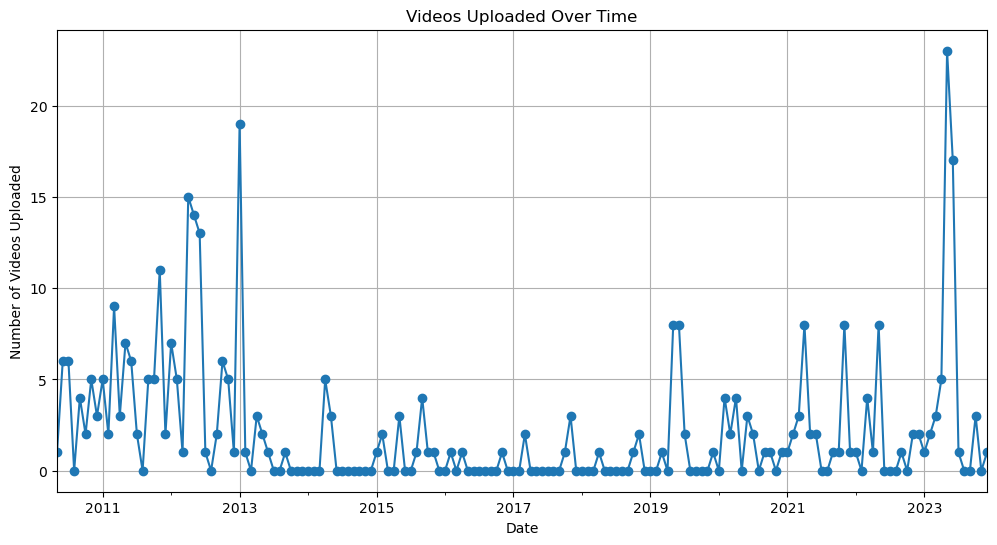

In [193]:
monthly_count = kke_sorted.resample('M', on='Published_Date').size()

# Step 3: Create a graph
plt.figure(figsize=(12, 6))
monthly_count.plot(kind='line', marker='o')  # Line plot with markers
plt.title('Videos Uploaded Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Videos Uploaded')
plt.grid(True)
plt.show()

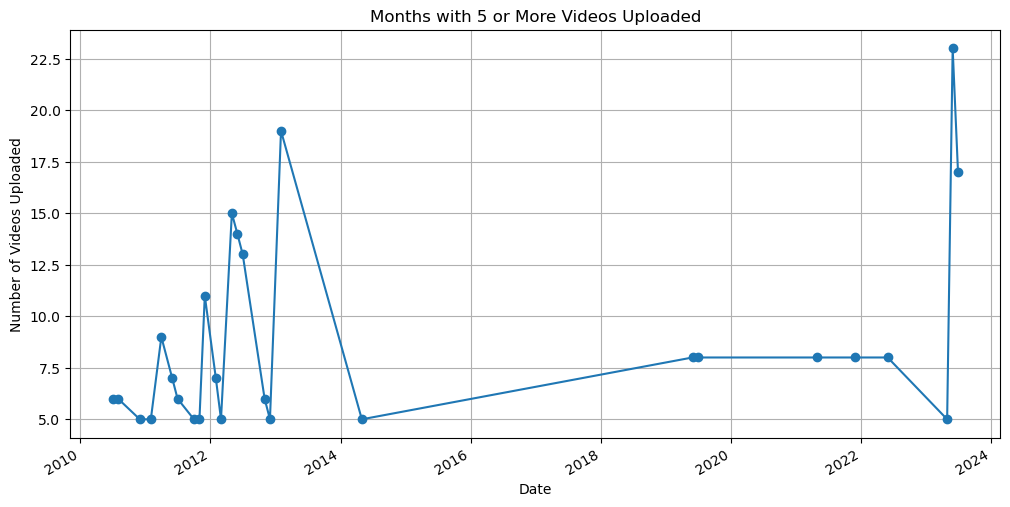

In [230]:
monthly_count = kke_sorted.resample('M', on='Published_Date').size()


filtered_monthly_count = monthly_count[monthly_count >= 5]


plt.figure(figsize=(12, 6))
filtered_monthly_count.plot(kind='line', marker='o')  # Line plot with markers for filtered data
plt.title('Months with 5 or More Videos Uploaded')
plt.xlabel('Date')
plt.ylabel('Number of Videos Uploaded')
plt.grid(True)
plt.show()

In [116]:
# Select a specific date range (replace start_date and end_date with your desired range)
start_date = '2023-01-01'
end_date = '2023-12-31'

selected_data = kke[(kke['Published_Date'] >= start_date) & (kke['Published_Date'] <= end_date)]

# Extract titles and descriptions
titles_and_descriptions = selected_data[['Title', 'Description']]

# Display the selected data
print(titles_and_descriptions.head())

                                               Title  \
0   Για την Παγκόσμια Ημέρα Μεταναστών | 18 Δεκέμβρη   
1  Δυνατή «Λαϊκή Συσπείρωση» παντού! Σύγκρουση με...   
2  Δεν απέχουμε! Ψηφίζουμε Λαϊκή Συσπείρωση στους...   
3  ΨΗΦΙΖΟΥΜΕ ΛΑΪΚΗ ΣΥΣΠΕΙΡΩΣΗ ΣΤΟΥΣ ΔΗΜΟΥΣ & ΤΙΣ ...   
4                   Νίκος Ζαχαριάδης 1903-1973 | ΚΚΕ   

                                         Description  
0  "Η φετινή Παγκόσμια Ημέρα Μετανάστη σημαδεύετα...  
1  Οι υποψήφιοι της ΝΔ, του ΣΥΡΙΖΑ και του ΠΑΣΟΚ ...  
2  Από τον αγώνα για τις ανάγκες των πολλών...\nΤ...  
3  Αρκετά με το "πάμε κι όπου βγει".\nΉ με τα κέρ...  
4  Εισαγωγικό βίντεο, που προβλήθηκε στην εκδήλωσ...  


In [119]:
# Save the selected titles and descriptions to a CSV file
titles_and_descriptions.to_csv('kke_selected_data.csv', index=False)

In [127]:
kke.to_csv('DimitrisKoutsoumpas_videos_data.csv')

### Video EDA (2) Kyriakos Mitsotakis - kyrmits

In [10]:
kyrmits = pd.read_csv('KyriakosMitsotakis_videos_data.csv')

In [22]:
# Convert 'Published_Date' to datetime format
kyrmits['Published_Date'] = pd.to_datetime(kyrmits['Published_Date'])

# Create a 'Date' column by extracting the date part from 'Published_Date'
kyrmits['Date'] = kyrmits['Published_Date'].dt.date

# Create a 'Time' column by extracting the time part from 'Published_Date'
kyrmits['Time'] = kyrmits['Published_Date'].dt.time

In [130]:
#Likes-to-Views
kyrmits['LikestoViews']= kyrmits['Likes']/kyrmits['Views']

#Comments-to-Views
kyrmits['CommentstoViews']= kyrmits['Comments']/kyrmits['Views']

#Dislikes-to-Views
kyrmits['DislikestoViews']= kyrmits['Dislikes']/kyrmits['Views']

#Combined Metric
kyrmits['Combined_Metric']= (0.45 * kyrmits['Views'])+(0.25 * kyrmits['Likes'])+(0.2 * kyrmits['Comments'])-(0.1 * kyrmits['Dislikes'])

In [165]:
summary_kyrmits = kyrmits.describe(include='all')

/Users/stavast/miniconda3/envs/ytDCproject/lib/python3.12/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


In [164]:
kyrmits.sort_values(by='Views', ascending=False).head(1)

Id                                Title  \
172  Eggi7DSyXFs  "Γιατί θα ιδιωτικοποιήσει το νερό;"   

               Published_Date                          Description  \
172 2023-05-08 18:51:33+00:00  "Γιατί θα ιδιωτικοποιήσει το νερό;"   

                                                  Tags    Views  Likes  \
172  ['Κυριάκος', 'μητσοτακης', 'kyriakos', 'mitsot...  1112578  20271   

     Dislikes  Comments        Date      Time  LikestoViews  CommentstoViews  \
172         0         0  2023-05-08  18:51:33       0.01822              0.0   

     DislikestoViews  Combined_Metric  
172              0.0        505727.85

In [29]:
row_index = 172
value = kyrmits.at[row_index, 'Title']
print(value)

"Γιατί θα ιδιωτικοποιήσει το νερό;"


In [163]:
kyrmits.sort_values(by='Combined_Metric', ascending=False).head(1)

Id                                Title  \
172  Eggi7DSyXFs  "Γιατί θα ιδιωτικοποιήσει το νερό;"   

               Published_Date                          Description  \
172 2023-05-08 18:51:33+00:00  "Γιατί θα ιδιωτικοποιήσει το νερό;"   

                                                  Tags    Views  Likes  \
172  ['Κυριάκος', 'μητσοτακης', 'kyriakos', 'mitsot...  1112578  20271   

     Dislikes  Comments        Date      Time  LikestoViews  CommentstoViews  \
172         0         0  2023-05-08  18:51:33       0.01822              0.0   

     DislikestoViews  Combined_Metric  
172              0.0        505727.85

In [162]:
kyrmits.sort_values(by='Likes', ascending=False).head(1)

Id                                Title  \
172  Eggi7DSyXFs  "Γιατί θα ιδιωτικοποιήσει το νερό;"   

               Published_Date                          Description  \
172 2023-05-08 18:51:33+00:00  "Γιατί θα ιδιωτικοποιήσει το νερό;"   

                                                  Tags    Views  Likes  \
172  ['Κυριάκος', 'μητσοτακης', 'kyriakos', 'mitsot...  1112578  20271   

     Dislikes  Comments        Date      Time  LikestoViews  CommentstoViews  \
172         0         0  2023-05-08  18:51:33       0.01822              0.0   

     DislikestoViews  Combined_Metric  
172              0.0        505727.85

In [23]:
kyrmits.sort_values(by='Published_Date', ascending=True).head(1)

Unnamed: 0.1  Unnamed: 0           Id  \
860           860         860  48zAd2_LpKM   

                                                 Title  \
860  Παρών στην Αγία Παρασκευή, στου Παπάγου και στ...   

                Published_Date                      Description  \
860  2007-06-09 06:43:04+00:00  Αγία Παρασκευή,Χολαργός,Παπάγου   

                                                  Tags  Views  Likes  \
860  ['Μητσοτάκης', 'Mitsotakis', 'Κυριάκος', 'kyri...   1385     18   

     Dislikes  Comments        Date      Time  LikestoViews  CommentstoViews  \
860         0         0  2007-06-09  06:43:04      0.012996              0.0   

     DislikestoViews  Combined_Metric  
860              0.0           627.75

In [ ]:
kyrmits_sorted = kyrmits.sort_values(by='Published_Date')

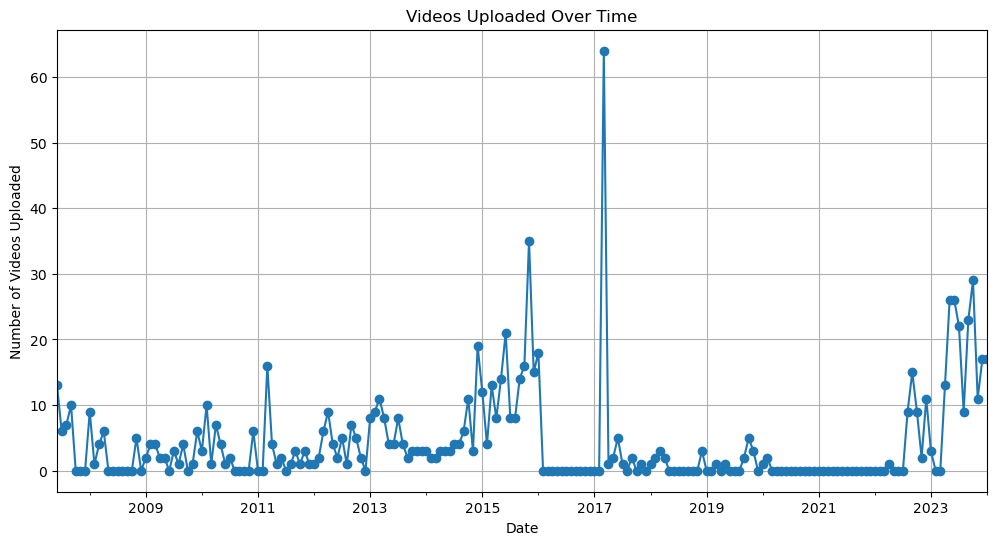

In [196]:
kyrmits_sorted = kyrmits.sort_values(by='Published_Date')

monthly_count = kyrmits.resample('M', on='Published_Date').size()

# Step 3: Create a graph
plt.figure(figsize=(12, 6))
monthly_count.plot(kind='line', marker='o')  # Line plot with markers
plt.title('Videos Uploaded Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Videos Uploaded')
plt.grid(True)
plt.show()

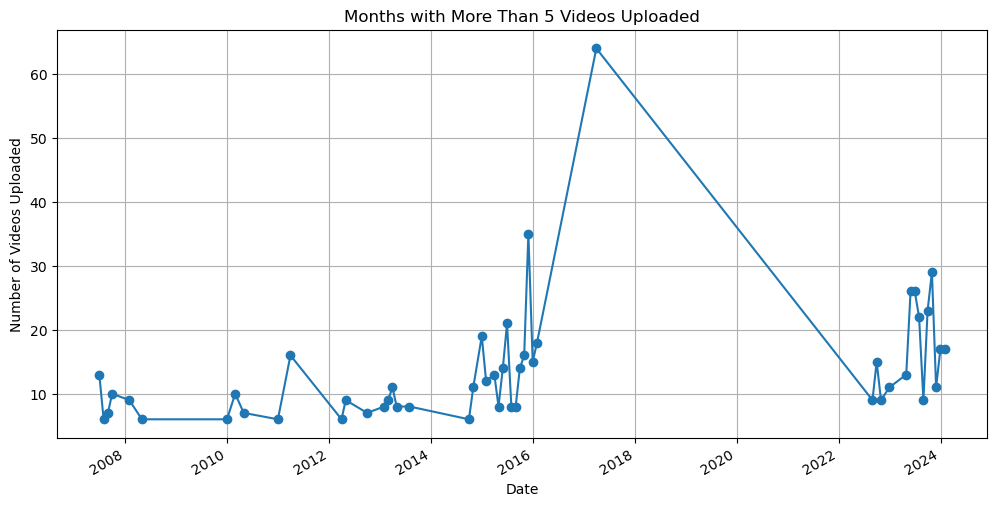

In [28]:
kyrmits_sorted = kyrmits.sort_values(by='Published_Date')

monthly_count = kyrmits_sorted.resample('M', on='Published_Date').size()

filtered_monthly_count = monthly_count[monthly_count > 5]

plt.figure(figsize=(12, 6))
filtered_monthly_count.plot(kind='line', marker='o')  # Line plot with markers for filtered data
plt.title('Months with More Than 5 Videos Uploaded')
plt.xlabel('Date')
plt.ylabel('Number of Videos Uploaded')
plt.grid(True)
plt.show()

In [25]:
kyrmits.to_csv('KyriakosMitsotakis_videos_data.csv')

In [120]:
# Select a specific date range (replace start_date and end_date with your desired range)
start_date = '2023-01-01'
end_date = '2023-12-31'

selected_data = kyrmits[(kyrmits['Published_Date'] >= start_date) & (kyrmits['Published_Date'] <= end_date)]

# Extract titles and descriptions
titles_and_descriptions = selected_data[['Title', 'Description']]

# Display the selected data
print(titles_and_descriptions.head())

                                                Title  \
19  Κυριάκος Μητσοτάκης: Με αυστηρά κριτήρια η λει...   
20  Αναβαθμίζουμε την τεχνική και επαγγελματική εκ...   
21  Εκδήλωση για την Επαγγελματική Εκπαίδευση και ...   
22  Κυριάκος Μητσοτάκης:Εισάγουμε επιτέλους και στ...   
23  Κυριάκος Μητσοτάκης: Συνάντηση με εγκαυματίες ...   

                                          Description  
19  Κυριάκος Μητσοτάκης: Με αυστηρά κριτήρια η λει...  
20  Η στήριξη της τεχνικής και επαγγελματικής εκπα...  
21  Εκδήλωση για την Επαγγελματική Εκπαίδευση και ...  
22  Κυριάκος Μητσοτάκης:Εισάγουμε επιτέλους και στ...  
23  Κυριάκος Μητσοτάκης: Συνάντηση με εγκαυματίες ...  


In [121]:
# Save the selected titles and descriptions to a CSV file
titles_and_descriptions.to_csv('kyrmits_selected_data.csv', index=False)

### Video EDA (3) Alexis Charitsis - alexharits

In [11]:
alexharits = pd.read_csv('AlexHaritsis_videos_data.csv')

In [32]:
alexharits.head(2)

Unnamed: 0           Id                                              Title  \
0           0  2Mhaxcx8iH4  Δήλωση Αλέξη Χαρίτση για στρατιωτικούς εξοπλισ...   
1           1  m5R_rTQ1ziQ            Συνέντευξη στο "Action24 " | 25.01.2024   

         Published_Date                                        Description  \
0  2024-01-29T13:36:49Z  Στο δημόσιο διάλογο στη χώρα μας υπάρχει διαχρ...   
1  2024-01-25T19:19:54Z  Ζωντανά η συνέντευξή μου στο Action24 και στον...   

  Tags  Views  Likes  Dislikes  Comments  
0   []  384.0   25.0       0.0       4.0  
1   []  504.0   26.0       0.0       0.0

In [33]:
# Convert 'Published_Date' to datetime format
alexharits['Published_Date'] = pd.to_datetime(alexharits['Published_Date'], errors='coerce')

# Create a 'Date' column by extracting the date part from 'Published_Date'
alexharits['Date'] = alexharits['Published_Date'].dt.date

# Create a 'Time' column by extracting the time part from 'Published_Date'
alexharits['Time'] = alexharits['Published_Date'].dt.time

In [35]:
#Likes-to-Views
alexharits['LikestoViews']= alexharits['Likes']/alexharits['Views']

#Comments-to-Views
alexharits['CommentstoViews']= alexharits['Comments']/alexharits['Views']

#Dislikes-to-Views
alexharits['DislikestoViews']= alexharits['Dislikes']/alexharits['Views']

#Combined Metric
alexharits['Combined_Metric']= (0.45 * alexharits['Views'])+(0.25 * alexharits['Likes'])+(0.2 * alexharits['Comments'])-(0.1 * alexharits['Dislikes'])

In [105]:
summary_alexharits = alexharits.describe(include='all')

In [161]:
alexharits.sort_values(by='Views', ascending=False).head(1)

Unnamed: 0           Id  \
87          87  GcZoVMdYz6w   

                                                Title  \
87  Συνέντευξη  στην εκπομπή "Καλημέρα Ελλάδα" του...   

              Published_Date  \
87 2023-05-30 07:39:04+00:00   

                                          Description Tags   Views  Likes  \
87  Συνέντευξη στην εκπομπή "Καλημέρα Ελλάδα" του ...   []  9166.0   47.0   

    Dislikes  Comments        Date      Time  LikestoViews  CommentstoViews  \
87       0.0       0.0  2023-05-30  07:39:04      0.005128              0.0   

    DislikestoViews  Combined_Metric  
87              0.0          4136.45

In [38]:
row_index = 10
value = alexharits.at[row_index, 'Title']
print(value)

Ομιλία - Πανελλαδική Σύσκεψη Στελεχών "ΝΕΑ ΑΡΙΣΤΕΡΑ" | 12.01.2024


In [160]:
alexharits.sort_values(by='Likes', ascending=False).head(1)

Unnamed: 0           Id  \
10          10  czcYqlvHn5Q   

                                                Title  \
10  Ομιλία - Πανελλαδική Σύσκεψη Στελεχών "ΝΕΑ ΑΡΙ...   

              Published_Date                                    Description  \
10 2024-01-12 18:32:07+00:00  Πανελλαδική σύσκεψη στελεχών της Νέα Αριστερά   

   Tags   Views  Likes  Dislikes  Comments        Date      Time  \
10   []  2188.0   58.0       0.0       6.0  2024-01-12  18:32:07   

    LikestoViews  CommentstoViews  DislikestoViews  Combined_Metric  
10      0.026508         0.002742              0.0           1000.3

In [159]:
alexharits.sort_values(by='Combined_Metric', ascending=False).head(1)

Unnamed: 0           Id  \
87          87  GcZoVMdYz6w   

                                                Title  \
87  Συνέντευξη  στην εκπομπή "Καλημέρα Ελλάδα" του...   

              Published_Date  \
87 2023-05-30 07:39:04+00:00   

                                          Description Tags   Views  Likes  \
87  Συνέντευξη στην εκπομπή "Καλημέρα Ελλάδα" του ...   []  9166.0   47.0   

    Dislikes  Comments        Date      Time  LikestoViews  CommentstoViews  \
87       0.0       0.0  2023-05-30  07:39:04      0.005128              0.0   

    DislikestoViews  Combined_Metric  
87              0.0          4136.45

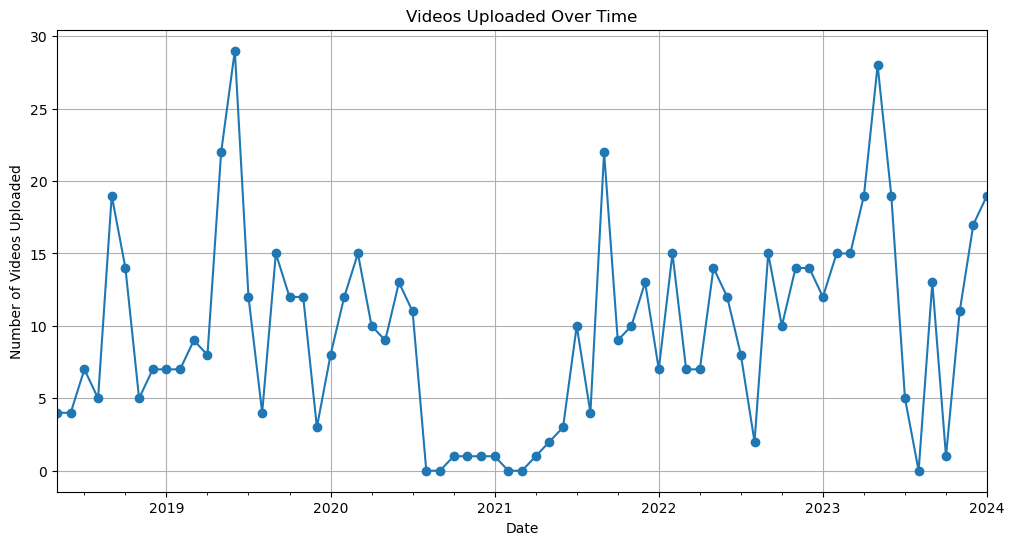

In [197]:
alexharits_sorted = alexharits.sort_values(by='Published_Date')

monthly_count = alexharits.resample('M', on='Published_Date').size()

# Step 3: Create a graph
plt.figure(figsize=(12, 6))
monthly_count.plot(kind='line', marker='o')  # Line plot with markers
plt.title('Videos Uploaded Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Videos Uploaded')
plt.grid(True)
plt.show()

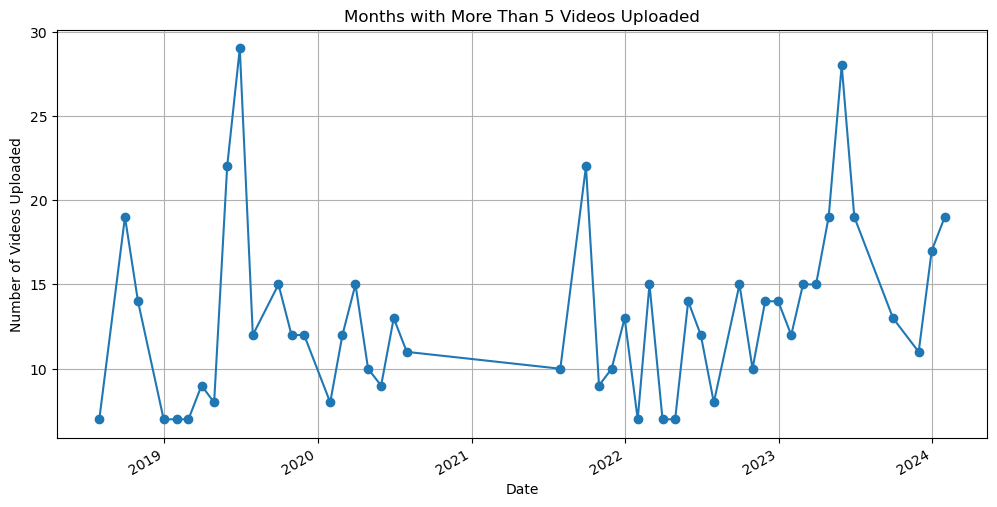

In [232]:
alexharits_sorted = alexharits.sort_values(by='Published_Date')

monthly_count = alexharits_sorted.resample('M', on='Published_Date').size()

filtered_monthly_count = monthly_count[monthly_count > 5]

plt.figure(figsize=(12, 6))
filtered_monthly_count.plot(kind='line', marker='o') 
plt.title('Months with More Than 5 Videos Uploaded')
plt.xlabel('Date')
plt.ylabel('Number of Videos Uploaded')
plt.grid(True)
plt.show()

In [36]:
alexharits.to_csv('AlexandrosHaritsis_videos_data.csv')

In [122]:
# Select a specific date range (replace start_date and end_date with your desired range)
start_date = '2023-01-01'
end_date = '2023-12-31'

selected_data = alexharits[(alexharits['Published_Date'] >= start_date) & (alexharits['Published_Date'] <= end_date)]

# Extract titles and descriptions
titles_and_descriptions = selected_data[['Title', 'Description']]

# Display the selected data
print(titles_and_descriptions.head())

                                                Title  \
19  Επίσκεψη στην Κοινωνική Δομή Παροχής Συσσιτίου...   
20  Συνέντευξη στον ρ/στ "Flash Fm" - Γιάννης Μαγκ...   
21        Συνέντευξη στον ρ/στ "Real fm" | 22.12.2023   
22  Ομιλία στην Βουλή - «Κύρωση του Κρατικού Προϋπ...   
23                Συνέντευξη στο "Mega TV" | 13.12.23   

                                          Description  
19  Επίσκεψη του Προέδρου της Κ.Ο. της Νέας Αριστε...  
20  Συνέντευξη στον ρ/στ "Flash Fm" και στον δημοσ...  
21  📻Συνέντευξη στονRealfm97.88 και στη δημοσιογρά...  
22  📌 Η Ομιλία μου στην ολομέλεια της #Βουλής κατά...  
23    📺 Συνέντευξη στην εκπομπή LIVE NEWS του Mega TV  


In [123]:
titles_and_descriptions.to_csv('alexharits_selected_data.csv', index=False)

### Video EDA (4) Stefanos Kasselakis - stefkass

In [12]:
stefkass = pd.read_csv('StefanosKasselakis_videos_data.csv')

In [40]:
# Convert 'Published_Date' to datetime format
stefkass['Published_Date'] = pd.to_datetime(stefkass['Published_Date'])

# Create a 'Date' column by extracting the date part from 'Published_Date'
stefkass['Date'] = stefkass['Published_Date'].dt.date

# Create a 'Time' column by extracting the time part from 'Published_Date'
stefkass['Time'] = stefkass['Published_Date'].dt.time

In [41]:
#Likes-to-Views
stefkass['LikestoViews']= stefkass['Likes']/stefkass['Views']

#Comments-to-Views
stefkass['CommentstoViews']= stefkass['Comments']/stefkass['Views']

#Dislikes-to-Views
stefkass['DislikestoViews']= stefkass['Dislikes']/stefkass['Views']

#Combined Metric
stefkass['Combined_Metric']= (0.45 * stefkass['Views'])+(0.25 * stefkass['Likes'])+(0.2 * stefkass['Comments'])-(0.1 * stefkass['Dislikes'])

In [47]:
stefkass.sort_values(by='Views', ascending=False).head(1)

Unnamed: 0           Id  \
59          59  XOtgBVEua_A   

                                                Title  \
59  Διαβάστε περισσότερα για την πλατφόρμα στο lin...   

              Published_Date Description Tags  Views  Likes  Dislikes  \
59 2023-08-21 11:50:52+00:00         NaN   []  94575   1777         0   

    Comments        Date      Time  LikestoViews  CommentstoViews  \
59       288  2023-08-21  11:50:52      0.018789         0.003045   

    DislikestoViews  Combined_Metric  
59              0.0          43060.6

In [48]:
stefkass.sort_values(by='Likes', ascending=False).head(1)

Unnamed: 0           Id  \
59          59  XOtgBVEua_A   

                                                Title  \
59  Διαβάστε περισσότερα για την πλατφόρμα στο lin...   

              Published_Date Description Tags  Views  Likes  Dislikes  \
59 2023-08-21 11:50:52+00:00         NaN   []  94575   1777         0   

    Comments        Date      Time  LikestoViews  CommentstoViews  \
59       288  2023-08-21  11:50:52      0.018789         0.003045   

    DislikestoViews  Combined_Metric  
59              0.0          43060.6

In [49]:
stefkass.sort_values(by='Combined_Metric', ascending=False).head(1)

Unnamed: 0           Id  \
59          59  XOtgBVEua_A   

                                                Title  \
59  Διαβάστε περισσότερα για την πλατφόρμα στο lin...   

              Published_Date Description Tags  Views  Likes  Dislikes  \
59 2023-08-21 11:50:52+00:00         NaN   []  94575   1777         0   

    Comments        Date      Time  LikestoViews  CommentstoViews  \
59       288  2023-08-21  11:50:52      0.018789         0.003045   

    DislikestoViews  Combined_Metric  
59              0.0          43060.6

In [45]:
row_index = 59
value = stefkass.at[row_index, 'Title']
print(value)

Διαβάστε περισσότερα για την πλατφόρμα στο link in bio.


In [42]:
summary_stefkass = stefkass.describe(include='all')

In [ ]:
stefkass.sort_values(by='', ascending=False).head(3)

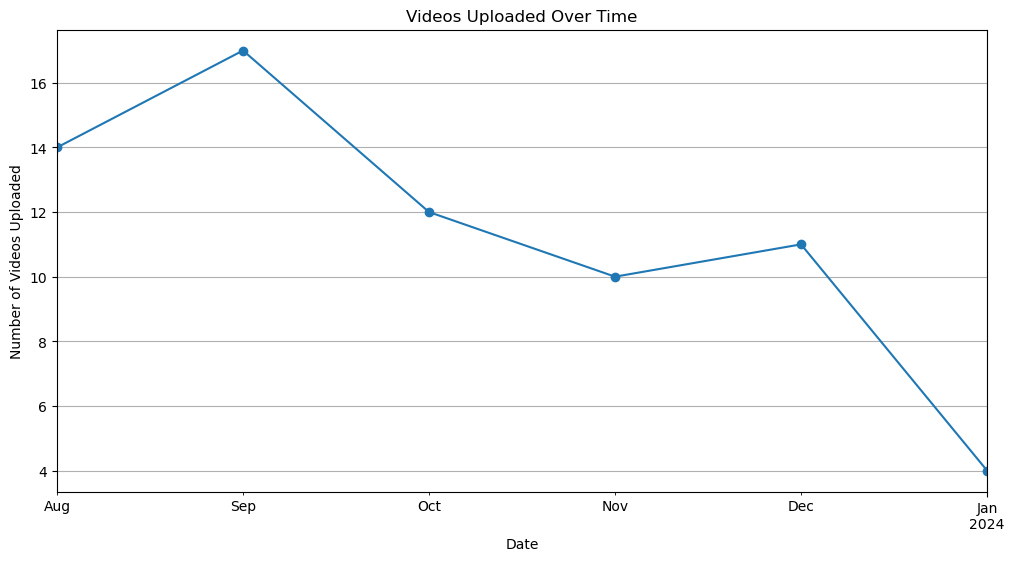

In [43]:
stefkass_sorted = stefkass.sort_values(by='Published_Date')

monthly_count = stefkass.resample('M', on='Published_Date').size()

# Step 3: Create a graph
plt.figure(figsize=(12, 6))
monthly_count.plot(kind='line', marker='o')  # Line plot with markers
plt.title('Videos Uploaded Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Videos Uploaded')
plt.grid(True)
plt.show()

In [139]:
stefkass.to_csv('StefanosKasselakis_videos_data.csv')

In [124]:
# Select a specific date range (replace start_date and end_date with your desired range)
start_date = '2023-01-01'
end_date = '2023-12-31'

selected_data = stefkass[(stefkass['Published_Date'] >= start_date) & (stefkass['Published_Date'] <= end_date)]

# Extract titles and descriptions
titles_and_descriptions = selected_data[['Title', 'Description']]

# Display the selected data
print(titles_and_descriptions.head())

                                               Title  \
4                                       Καλή Χρονιά!   
5  Θέλησα να κάνω τις αόρατες διαδρομές στην πόλη...   
6  Κάλαντα Χριστουγέννων από τον Σύλλογο «Δικταίο...   
7  Ομιλία στο Digital Economy Forum 2023: «Shapin...   
8  Ομιλία στη συνεδρίαση της Κοινοβουλευτικής Ομά...   

                                         Description  
4                                                NaN  
5  Ημέρες γιορτής στην Αθήνα. Θέλησα να κάνω τις ...  
6  Με δύναμη από την Κρήτη, για όλη την Ελλάδα.\n...  
7  Ομιλία στο Digital Economy Forum 2023: «Shapin...  
8  Ομιλία στη συνεδρίαση της Κοινοβουλευτικής Ομά...  


In [125]:
titles_and_descriptions.to_csv('stefkass_selected_data.csv', index=False)

### Video EDA (5) Nikos Androulakis - nikan

In [14]:
nikan = pd.read_csv('NikosAndroulakis_videos_data.csv')

In [52]:
# Convert 'Published_Date' to datetime format
nikan['Published_Date'] = pd.to_datetime(nikan['Published_Date'])

# Create a 'Date' column by extracting the date part from 'Published_Date'
nikan['Date'] = nikan['Published_Date'].dt.date

# Create a 'Time' column by extracting the time part from 'Published_Date'
nikan['Time'] = nikan['Published_Date'].dt.time

In [53]:
#Likes-to-Views
nikan['LikestoViews']= nikan['Likes']/nikan['Views']

#Comments-to-Views
nikan['CommentstoViews']= nikan['Comments']/nikan['Views']

#Dislikes-to-Views
nikan['DislikestoViews']= nikan['Dislikes']/nikan['Views']

#Combined Metric
nikan['Combined_Metric']= (0.45 * nikan['Views'])+(0.25 * nikan['Likes'])+(0.2 * nikan['Comments'])-(0.1 * nikan['Dislikes'])

In [ ]:
summary_nikan = nikan.describe(include='all')

In [15]:
nikan.sort_values(by='Views', ascending=False).head(1)

Unnamed: 0           Id                                            Title  \
95          95  ussimLvRGlQ  Στις 25 Ιουνίου, μαζί κάνουμε την αλλαγή δυνατή   

               Published_Date  \
95  2023-06-15 22:48:08+00:00   

                                          Description Tags    Views  Likes  \
95  To ΠΑΣΟΚ με τη δική σας στήριξη, μπήκε σε μια ...   []  1669616    167   

    Dislikes  Comments        Date      Time  LikestoViews  CommentstoViews  \
95         0        23  2023-06-15  22:48:08        0.0001         0.000014   

    DislikestoViews  Combined_Metric  
95              0.0        751373.55

In [57]:
row_index = 10
value = nikan.at[row_index, 'Title']
print(value)

Τι φοβάται ο κ. Μητσοτάκης;


In [13]:
nikan.sort_values(by='Published_Date', ascending=True).head(1)

Unnamed: 0           Id  \
353         353  CBMjB8NEz0o   

                                                 Title  \
353  Παρέμβαση Νίκου Ανδρουλάκη - Η κατάσταση στο Κ...   

                Published_Date  \
353  2014-12-01 11:20:02+00:00   

                                           Description  \
353  Κύριε Πρόεδρε, οι αγριότητες του Ισλαμικού κρά...   

                                                  Tags  Views  Likes  \
353  ['ΕΥΡΩΒΟΥΛΗ', 'EUROPARLIAMENT', 'KOBANE', 'AND...    304      3   

     Dislikes  Comments        Date      Time  LikestoViews  CommentstoViews  \
353         0         0  2014-12-01  11:20:02      0.009868              0.0   

     DislikestoViews  Combined_Metric  
353              0.0           137.55

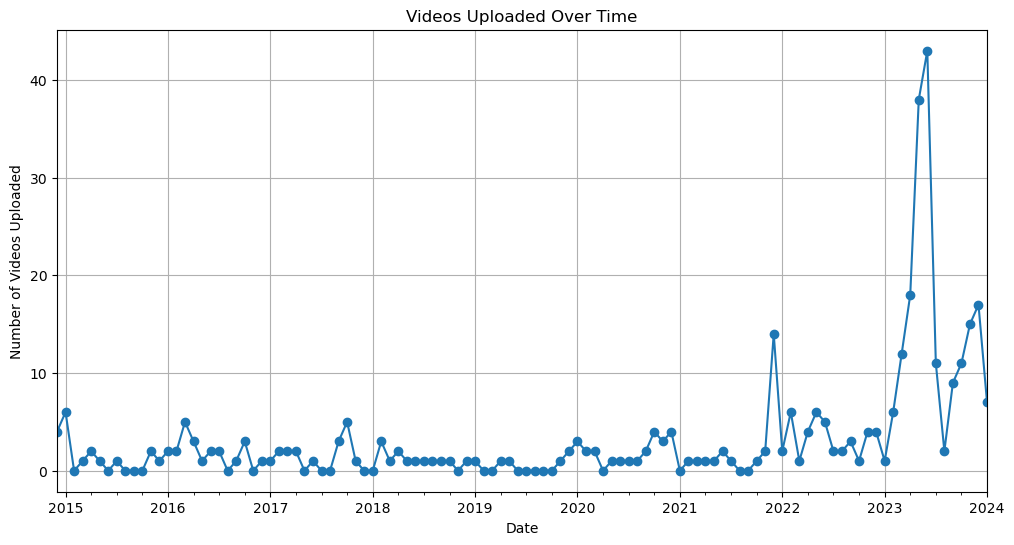

In [199]:
nikan_sorted = nikan.sort_values(by='Published_Date')

monthly_count = nikan.resample('M', on='Published_Date').size()

# Step 3: Create a graph
plt.figure(figsize=(12, 6))
monthly_count.plot(kind='line', marker='o')  # Line plot with markers
plt.title('Videos Uploaded Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Videos Uploaded')
plt.grid(True)
plt.show()

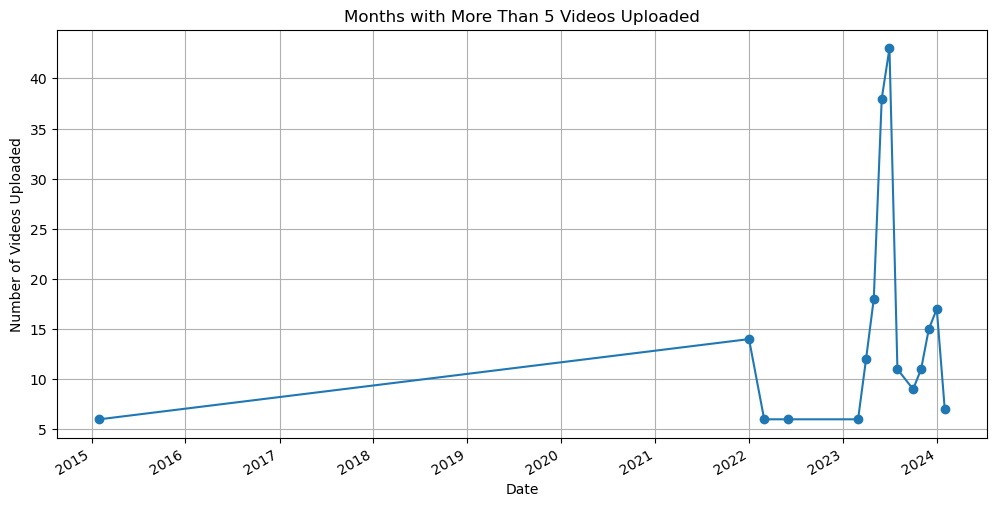

In [233]:
nikan_sorted = nikan.sort_values(by='Published_Date')

monthly_count = nikan_sorted.resample('M', on='Published_Date').size()

filtered_monthly_count = monthly_count[monthly_count > 5]

plt.figure(figsize=(12, 6))
filtered_monthly_count.plot(kind='line', marker='o')
plt.title('Months with More Than 5 Videos Uploaded')
plt.xlabel('Date')
plt.ylabel('Number of Videos Uploaded')
plt.grid(True)
plt.show()

In [143]:
nikan.to_csv('NikosAndroulakis_videos_data.csv')

In [126]:
# Select a specific date range (replace start_date and end_date with your desired range)
start_date = '2023-01-01'
end_date = '2023-12-31'

selected_data = nikan[(nikan['Published_Date'] >= start_date) & (nikan['Published_Date'] <= end_date)]

# Extract titles and descriptions
titles_and_descriptions = selected_data[['Title', 'Description']]

# Display the selected data
print(titles_and_descriptions.head())

                                                Title  \
8   Χριστουγεννιάτικα κάλαντα στο ΠΑΣΟΚ από τον χο...   
9   Ζωντανά στον ΣΚΑΪ και στους Αταίριαστους με το...   
10                        Τι φοβάται ο κ. Μητσοτάκης;   
11                   Ζωντανά από τη Βουλή των Ελλήνων   
12                   Ζωντανά από τη Βουλή των Ελλήνων   

                                          Description  
8   Χρόνια Πολλά, Καλά Χριστούγεννα, υγεία και ευη...  
9                                               #live  
10                                                NaN  
11                                              #live  
12                                              #live  


In [127]:
titles_and_descriptions.to_csv('nikan_selected_data.csv', index=False)

### Video EDA (6) Plefsi Eleftherias - plefzoe

In [15]:
plefzoe = pd.read_csv('ZoeKonstantopoulou_videos_data.csv')

In [38]:
# Convert 'Published_Date' to datetime format
plefzoe['Published_Date'] = pd.to_datetime(plefzoe['Published_Date'])

# Create a 'Date' column by extracting the date part from 'Published_Date'
plefzoe['Date'] = plefzoe['Published_Date'].dt.date

# Create a 'Time' column by extracting the time part from 'Published_Date'
plefzoe['Time'] = plefzoe['Published_Date'].dt.time

In [63]:
#Likes-to-Views
plefzoe['LikestoViews']= plefzoe['Likes']/plefzoe['Views']

#Comments-to-Views
plefzoe['CommentstoViews']= plefzoe['Comments']/plefzoe['Views']

#Dislikes-to-Views
plefzoe['DislikestoViews']= plefzoe['Dislikes']/plefzoe['Views']

#Combined Metric
plefzoe['Combined_Metric']= (0.45 * plefzoe['Views'])+(0.25 * plefzoe['Likes'])+(0.2 * plefzoe['Comments'])-(0.1 * plefzoe['Dislikes'])

In [ ]:
summary_plefzoe = plefzoe.describe(include='all')

In [68]:
plefzoe.sort_values(by='Combined_Metric', ascending=False).head(1)

Unnamed: 0           Id  \
412         412  AGLAaRyno1s   

                                                 Title  \
412  Η Ζωή Κωνσταντοπούλου στη Super Κατερίνα (28/0...   

               Published_Date  \
412 2023-06-28 14:15:18+00:00   

                                           Description  \
412  Η Ζωή Κωνσταντοπούλου, πρόεδρος της Πλεύσης Ελ...   

                                                  Tags  Views  Likes  \
412  ['πλευση', 'πλευση ελευθεριας', 'plefsi', 'ple...  24632    354   

     Dislikes  Comments        Date      Time  LikestoViews  CommentstoViews  \
412         0        58  2023-06-28  14:15:18      0.014372         0.002355   

     DislikestoViews  Combined_Metric  
412              0.0          11184.5

In [67]:
row_index = 24
value = plefzoe.at[row_index, 'Title']
print(value)

Ζωή Κωνσταντοπούλου: Εξεταστική Επιτροπή για τη διερεύνηση του εγκλήματος των Τεμπών (05/12/23).


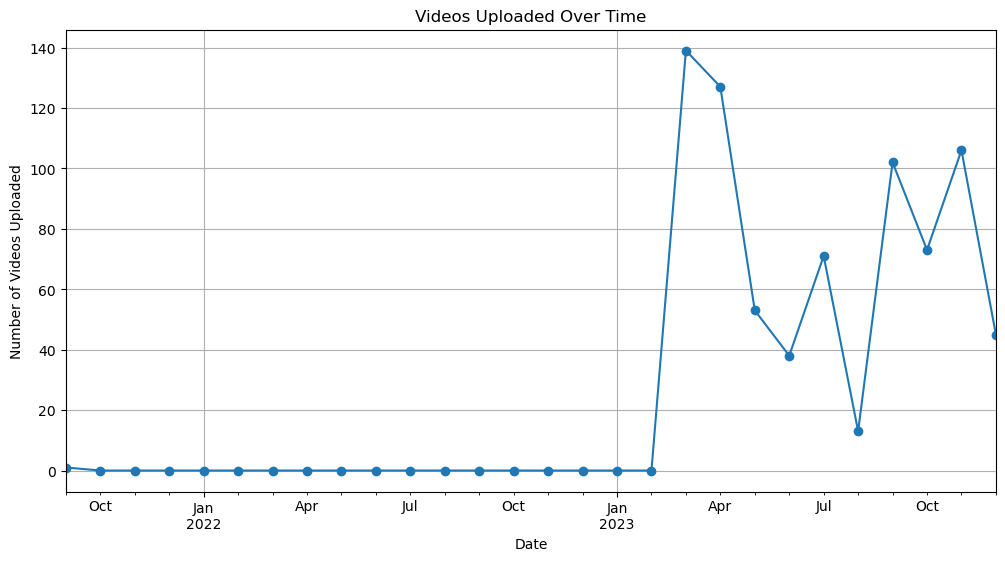

In [200]:
plefzoe_sorted = plefzoe.sort_values(by='Published_Date')

monthly_count = plefzoe.resample('M', on='Published_Date').size()

# Step 3: Create a graph
plt.figure(figsize=(12, 6))
monthly_count.plot(kind='line', marker='o')  # Line plot with markers
plt.title('Videos Uploaded Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Videos Uploaded')
plt.grid(True)
plt.show()

In [146]:
plefzoe.to_csv('ZoeKonstantopoulou_videos_data.csv')

In [126]:
# Select a specific date range (replace start_date and end_date with your desired range)
start_date = '2023-01-01'
end_date = '2023-12-31'

selected_data = nikan[(nikan['Published_Date'] >= start_date) & (nikan['Published_Date'] <= end_date)]

# Extract titles and descriptions
titles_and_descriptions = selected_data[['Title', 'Description']]

# Display the selected data
print(titles_and_descriptions.head())

                                                Title  \
8   Χριστουγεννιάτικα κάλαντα στο ΠΑΣΟΚ από τον χο...   
9   Ζωντανά στον ΣΚΑΪ και στους Αταίριαστους με το...   
10                        Τι φοβάται ο κ. Μητσοτάκης;   
11                   Ζωντανά από τη Βουλή των Ελλήνων   
12                   Ζωντανά από τη Βουλή των Ελλήνων   

                                          Description  
8   Χρόνια Πολλά, Καλά Χριστούγεννα, υγεία και ευη...  
9                                               #live  
10                                                NaN  
11                                              #live  
12                                              #live  


In [127]:
titles_and_descriptions.to_csv('nikan_selected_data.csv', index=False)

### Video EDA (7) Elliniki Lysi - Kyriakos Velopoulos - ellykyrvel

In [16]:
ellykyrvel = pd.read_csv('KyriakosVelopoulos_videos_data.csv')

In [70]:
# Convert 'Published_Date' to datetime format
ellykyrvel['Published_Date'] = pd.to_datetime(ellykyrvel['Published_Date'])

# Create a 'Date' column by extracting the date part from 'Published_Date'
ellykyrvel['Date'] = ellykyrvel['Published_Date'].dt.date

# Create a 'Time' column by extracting the time part from 'Published_Date'
ellykyrvel['Time'] = ellykyrvel['Published_Date'].dt.time

In [71]:
#Likes-to-Views
ellykyrvel['LikestoViews']= ellykyrvel['Likes']/ellykyrvel['Views']

#Comments-to-Views
ellykyrvel['CommentstoViews']= ellykyrvel['Comments']/ellykyrvel['Views']

#Dislikes-to-Views
ellykyrvel['DislikestoViews']= ellykyrvel['Dislikes']/ellykyrvel['Views']

#Combined Metric
ellykyrvel['Combined_Metric']= (0.45 * ellykyrvel['Views'])+(0.25 * ellykyrvel['Likes'])+(0.2 * ellykyrvel['Comments'])-(0.1 * ellykyrvel['Dislikes'])

In [ ]:
summary_ellykyrvel = ellykyrvel.describe(include='all')

In [36]:
ellykyrvel.sort_values(by='Views', ascending=False).head(1)

Unnamed: 0           Id  \
2158        2158  a3bfGhGDpRk   

                                                  Title  \
2158  ΣΥΝΑΝΤΗΣΗ ΠΟΥΤΙΝ-ΒΕΛΟΠΟΥΛΟΥ ΣΤΟ ΑΓΙΟΝ ΟΡΟΣ...(...   

                 Published_Date Description Tags   Views  Likes  Dislikes  \
2158  2018-01-12 11:36:15+00:00         NaN   []  254165      0         0   

      Comments        Date      Time  LikestoViews  CommentstoViews  \
2158         0  2018-01-12  11:36:15           0.0              0.0   

      DislikestoViews  Combined_Metric  
2158              0.0        114374.25

In [75]:
row_index = 54
value = ellykyrvel.at[row_index, 'Title']
print(value)

ΚΥΡΙΑΚΟΣ ΒΕΛΟΠΟΥΛΟΣ ΕΛΛΗΝΙΚΗ ΛΥΣΗ - Ζωντανά η ομιλία για τον Προϋπολογισμό 2024 στη Βουλή 17/12/2023


In [ ]:
ellykyrvel.sort_values(by='', ascending=False).head(3)

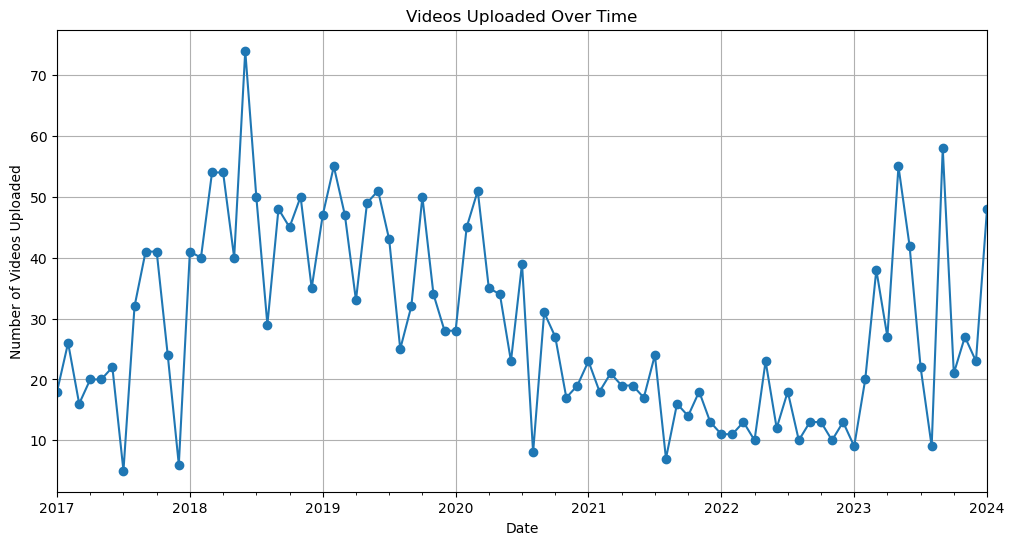

In [201]:
ellykyrvel_sorted = ellykyrvel.sort_values(by='Published_Date')

monthly_count = ellykyrvel.resample('M', on='Published_Date').size()

# Step 3: Create a graph
plt.figure(figsize=(12, 6))
monthly_count.plot(kind='line', marker='o')  # Line plot with markers
plt.title('Videos Uploaded Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Videos Uploaded')
plt.grid(True)
plt.show()

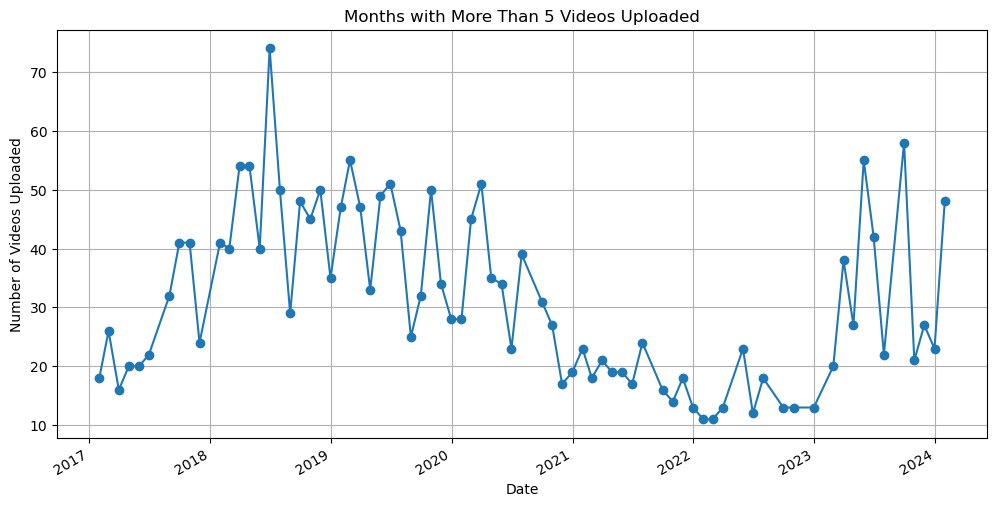

In [249]:
ellykyrvel_sorted = ellykyrvel.sort_values(by='Published_Date')

monthly_count = ellykyrvel_sorted.resample('M', on='Published_Date').size()

filtered_monthly_count = monthly_count[monthly_count > 10]

plt.figure(figsize=(12, 6))
filtered_monthly_count.plot(kind='line', marker='o')
plt.title('Months with More Than 5 Videos Uploaded')
plt.xlabel('Date')
plt.ylabel('Number of Videos Uploaded')
plt.grid(True)
plt.show()

In [150]:
ellykyrvel.to_csv('KyriakosVelopoulos_videos_data.csv')

In [128]:
# Select a specific date range (replace start_date and end_date with your desired range)
start_date = '2023-01-01'
end_date = '2023-12-31'

selected_data = ellykyrvel[(ellykyrvel['Published_Date'] >= start_date) & (ellykyrvel['Published_Date'] <= end_date)]

# Extract titles and descriptions
titles_and_descriptions = selected_data[['Title', 'Description']]

# Display the selected data
print(titles_and_descriptions.head())

                                                Title  \
49  ΚΥΡΙΑΚΟΣ ΒΕΛΟΠΟΥΛΟΣ  ΕΛΛΗΝΙΚΗ ΛΥΣΗ - ΤΟ ΧΡΙΣΤΟ...   
50  ΚΥΡΙΑΚΟΣ ΒΕΛΟΠΟΥΛΟΣ - ΕΛΛΗΝΙΚΗ ΛΥΣΗ:  ΔΗΛΩΣΗ  ...   
51  ΚΥΡΙΑΚΟΣ ΒΕΛΟΠΟΥΛΟΣ ΕΛΛΗΝΙΚΗ ΛΥΣΗ - Ζωντανά η ...   
52  ΚΥΡΙΑΚΟΣ ΒΕΛΟΠΟΥΛΟΣ ΕΛΛΗΝΙΚΗ ΛΥΣΗ - ΑΠΑΝΤΗΣΗ Σ...   
53  ΚΥΡΙΑΚΟΣ ΒΕΛΟΠΟΥΛΟΣ ΕΛΛΗΝΙΚΗ ΛΥΣΗ - Ομιλία στη...   

                                          Description  
49  Ελληνίδες, Έλληνες\nΗ εορτή των Χριστουγέννων ...  
50  Εξαγγελίες από τον πρωθυπουργό, που προκαλούν ...  
51                                                NaN  
52                                                NaN  
53                                                NaN  


In [129]:
titles_and_descriptions.to_csv('ellykyrvel_selected_data.csv', index=False)

### Video EDA (8) Spartiates (Official Page) - spartvasilstig

In [17]:
spartvasilstig = pd.read_csv('VasilisStigas_videos_data.csv')

In [78]:
# Convert 'Published_Date' to datetime format
spartvasilstig['Published_Date'] = pd.to_datetime(spartvasilstig['Published_Date'])

# Create a 'Date' column by extracting the date part from 'Published_Date'
spartvasilstig['Date'] = spartvasilstig['Published_Date'].dt.date

# Create a 'Time' column by extracting the time part from 'Published_Date'
spartvasilstig['Time'] = spartvasilstig['Published_Date'].dt.time

In [79]:
#Likes-to-Views
spartvasilstig['LikestoViews']= spartvasilstig['Likes']/spartvasilstig['Views']

#Comments-to-Views
spartvasilstig['CommentstoViews']= spartvasilstig['Comments']/spartvasilstig['Views']

#Dislikes-to-Views
spartvasilstig['DislikestoViews']= spartvasilstig['Dislikes']/spartvasilstig['Views']

#Combined Metric
spartvasilstig['Combined_Metric']= (0.45 * spartvasilstig['Views'])+(0.25 * spartvasilstig['Likes'])+(0.2 * spartvasilstig['Comments'])-(0.1 * spartvasilstig['Dislikes'])

In [ ]:
summary_spartvasilstig = spartvasilstig.describe(include='all')

In [34]:
spartvasilstig.sort_values(by='Likes', ascending=False).head(1)

Unnamed: 0           Id  \
65          65  EO2ykDOJmWE   

                                                Title  \
65  «Κεραυνοί» Προέδρου της Κ.Ο. «ΣΠΑΡΤΙΑΤΕΣ», Βασ...   

               Published_Date                                  Description  \
65  2024-01-11 12:54:16+00:00  «Το Πρωινό» με τον Γιώργο Λιάγκα 11/01/2024   

   Tags  Views  Likes  Dislikes  Comments        Date      Time  LikestoViews  \
65   []  13708    168         0         3  2024-01-11  12:54:16      0.012256   

    CommentstoViews  DislikestoViews  Combined_Metric  
65         0.000219              0.0           6211.2

In [35]:
row_index = 65
value = spartvasilstig.at[row_index, 'Title']
print(value)

«Κεραυνοί» Προέδρου της Κ.Ο. «ΣΠΑΡΤΙΑΤΕΣ», Βασίλειου Στίγκα, στον ΑΝΤ1 για τους γάμους ομοφυλοφίλων


In [31]:
spartvasilstig.sort_values(by='Published_Date', ascending=True).head(1)

Unnamed: 0           Id  \
418         418  tFBqGvgLxAk   

                                                 Title  \
418  ''ΣΠΑΡΤΙΑΤΕΣ''  12 Ιουλίου 2017   Διονύσης Χιόνης   

                Published_Date  \
418  2018-06-15 03:45:01+00:00   

                                           Description  \
418  Σπαρτιάτες (δίκτυο κοινωνικής δράσης και αλληλ...   

                                                  Tags  Views  Likes  \
418  ['ΣΠΑΡΤΙΑΤΕΣ', 'ΧΙΟΝΗΣ Διονύσης', 'ΟΙΚΟΝΟΜΙΑ',...     82      0   

     Dislikes  Comments        Date      Time  LikestoViews  CommentstoViews  \
418         0         0  2018-06-15  03:45:01           0.0              0.0   

     DislikestoViews  Combined_Metric  
418              0.0             36.9

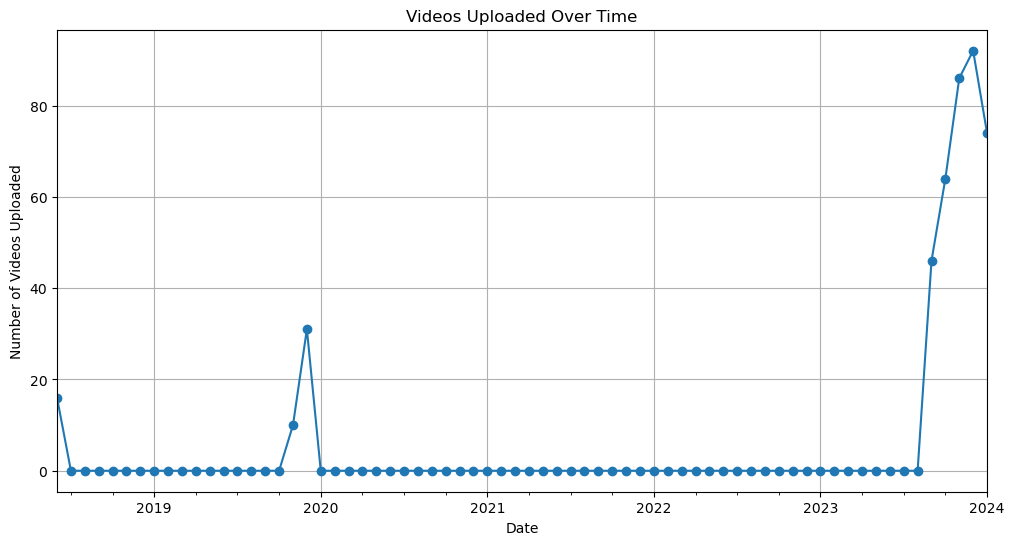

In [202]:
spartvasilstig_sorted = spartvasilstig.sort_values(by='Published_Date')

monthly_count = spartvasilstig.resample('M', on='Published_Date').size()

# Step 3: Create a graph
plt.figure(figsize=(12, 6))
monthly_count.plot(kind='line', marker='o')  # Line plot with markers
plt.title('Videos Uploaded Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Videos Uploaded')
plt.grid(True)
plt.show()

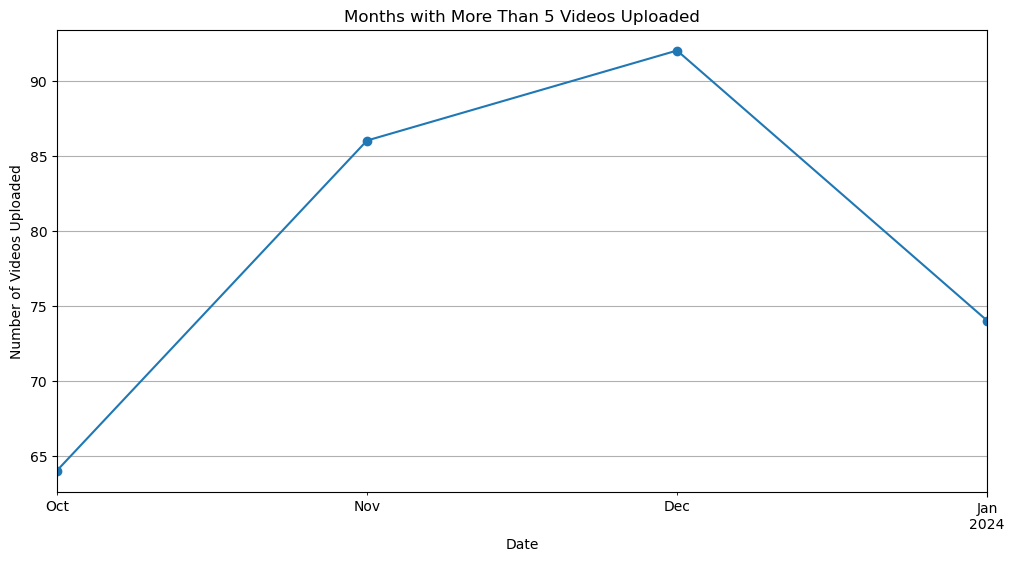

In [244]:
spartvasilstig_sorted = spartvasilstig.sort_values(by='Published_Date')

monthly_count = spartvasilstig_sorted.resample('M', on='Published_Date').size()

filtered_monthly_count = monthly_count[monthly_count > 60]

plt.figure(figsize=(12, 6))
filtered_monthly_count.plot(kind='line', marker='o')
plt.title('Months with More Than 5 Videos Uploaded')
plt.xlabel('Date')
plt.ylabel('Number of Videos Uploaded')
plt.grid(True)
plt.show()

In [154]:
spartvasilstig.to_csv('VasilisStigas_videos_data.csv')

In [130]:
# Select a specific date range (replace start_date and end_date with your desired range)
start_date = '2023-01-01'
end_date = '2023-12-31'

selected_data = spartvasilstig[(spartvasilstig['Published_Date'] >= start_date) & (spartvasilstig['Published_Date'] <= end_date)]

# Extract titles and descriptions
titles_and_descriptions = selected_data[['Title', 'Description']]

# Display the selected data
print(titles_and_descriptions.head())

                                                Title Description
74  Χριστουγεννιάτικη επίσκεψη κλιμακίου της Κ.Ο. ...  21/12/2023
75  Τοποθέτηση του Βουλευτή Αιτωλοακαρνανίας, Διον...  18/12/2023
76  Ο Βουλευτής Α' Θεσσαλονίκης, Ι. Κόντης, κατά τ...  20/12/2023
77  Ο Βουλευτής Α' Θεσσαλονίκης, Ιωάννης Κόντης, σ...  20/12/2023
78  Ο Βουλευτής Β' Θεσσαλονίκης Π. Δημητριάδης κατ...  18/12/2023


In [131]:
titles_and_descriptions.to_csv('spartvasilstig_selected_data.csv', index=False)

### Video EDA (9) NIKI - nikinats

In [18]:
nikinats = pd.read_csv('DimitrisNatsios_videos_data.csv')

In [86]:
# Convert 'Published_Date' to datetime format
nikinats['Published_Date'] = pd.to_datetime(nikinats['Published_Date'])

# Create a 'Date' column by extracting the date part from 'Published_Date'
nikinats['Date'] = nikinats['Published_Date'].dt.date

# Create a 'Time' column by extracting the time part from 'Published_Date'
nikinats['Time'] = nikinats['Published_Date'].dt.time

In [87]:
#Likes-to-Views
nikinats['LikestoViews']= nikinats['Likes']/nikinats['Views']

#Comments-to-Views
nikinats['CommentstoViews']= nikinats['Comments']/nikinats['Views']

#Dislikes-to-Views
nikinats['DislikestoViews']= nikinats['Dislikes']/nikinats['Views']

#Combined Metric
nikinats['Combined_Metric']= (0.45 * nikinats['Views'])+(0.25 * nikinats['Likes'])+(0.2 * nikinats['Comments'])-(0.1 * nikinats['Dislikes'])

In [ ]:
summary_nikinats = nikinats.describe(include='all')

In [21]:
nikinats.sort_values(by='Likes', ascending=False).head(1)

Unnamed: 0           Id  \
204         204  -8U8Siti6bQ   

                                                 Title  \
204  ΤΑ ΑΙΣΧΗ ΤΩΝ ΣΧΟΛΙΚΩΝ ΒΙΒΛΙΩΝ - Απαράδεκτη η υ...   

                Published_Date  \
204  2023-09-13 09:31:29+00:00   

                                           Description Tags   Views  Likes  \
204  Ο πρόεδρος της ΝΙΚΗΣ Δημήτρης Νατσιός ενημερών...   []  175472   5765   

     Dislikes  Comments        Date      Time  LikestoViews  CommentstoViews  \
204         0      2001  2023-09-13  09:31:29      0.032854         0.011404   

     DislikestoViews  Combined_Metric  
204              0.0         80803.85

In [91]:
row_index = 204
value = nikinats.at[row_index, 'Title']
print(value)

ΤΑ ΑΙΣΧΗ ΤΩΝ ΣΧΟΛΙΚΩΝ ΒΙΒΛΙΩΝ - Απαράδεκτη η υφυπουργός


In [ ]:
nikinats.sort_values(by='', ascending=False).head(3)

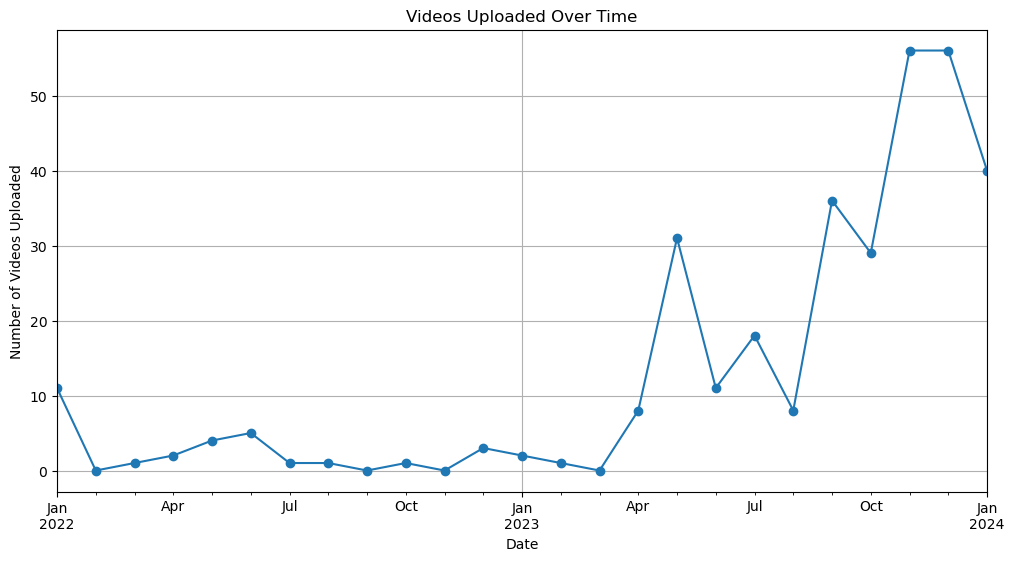

In [203]:
nikinats_sorted = nikinats.sort_values(by='Published_Date')

monthly_count = nikinats.resample('M', on='Published_Date').size()

# Step 3: Create a graph
plt.figure(figsize=(12, 6))
monthly_count.plot(kind='line', marker='o')  # Line plot with markers
plt.title('Videos Uploaded Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Videos Uploaded')
plt.grid(True)
plt.show()

In [158]:
nikinats.to_csv('DimitrisNatsios_videos_data.csv')

In [132]:
# Select a specific date range (replace start_date and end_date with your desired range)
start_date = '2023-01-01'
end_date = '2023-12-31'

selected_data = nikinats[(nikinats['Published_Date'] >= start_date) & (nikinats['Published_Date'] <= end_date)]

# Extract titles and descriptions
titles_and_descriptions = selected_data[['Title', 'Description']]

# Display the selected data
print(titles_and_descriptions.head())

                                                Title  \
40  Κοινοβουλευτικό Έργο Ανδρέα Βορύλλα, μέλους τη...   
41  "Όλα τα έργα έχουν φαγοπότι": Η επιτομή της κο...   
42  Τέμπη: Η ΝΙΚΗ ξεκίνησε να ξετυλίγει το κουβάρι...   
43  Προκλητικές αυξήσεις σε εξωκοινοβουλευτικούς υ...   
44  Σας ενδιαφέρει η ατζέντα του Νταβός και όχι ο ...   

                                          Description  
40  Αποσπάσματα ομιλιών του Ανδρέα Βορύλλα, μέλους...  
41  "Όλα τα έργα έχουν φαγοπότι".\nΑυτή είναι η επ...  
42  ΟΣΕ και ΕΡΓΟΣΕ είναι συνυπεύθυνοι για την εγκλ...  
43  Με αφορμή το περιστατικό του σοβαρού τραυματισ...  
44  Αποσύρθηκε από το Ελληνικό Γενικό Προξενείο τη...  


In [133]:
titles_and_descriptions.to_csv('nikinats_selected_data.csv', index=False)

## Across Channels Analysis

### Across Channels Analysis creation of Table

In [182]:
# Mapping of Channel_names to their uploads dataFrames
uploads_df_mapping = {
    'Spartiates (Official Page)': spartvasilstig,
    'Kommounistiko Komma Elladas': kke,
    'Plefsi Eleftherias': plefzoe,
    'Kyriakos Mitsotakis': kyrmits,
    'NIKI': nikinats,
    'Nikos Androulakis': nikan,
    'Stefanos Kasselakis': stefkass,
    'Elliniki Lysi - Kyriakos Velopoulos': ellykyrvel,
    'Alexandros Charitsis': alexharits
}

# across_cha dataFrame creation
across_cha_columns = ['Channel_name', 'c_subs', 'c_views', 'c_totalvid', 'c_vts', 'view_mean', 'likes_mean',
                      'vtl_mean', 'cm_mean', 'view_sd', 'likes_sd', 'vtl_sd', 'cm_sd']

# list to collect objects for each row
data_rows = []

# loop for each channel
for channel_name, uploads_df in uploads_df_mapping.items():
    # Get channel data from channels DataFrame
    channel_row = channels[channels['Channel_name'] == channel_name].iloc[0]
    c_subs = channel_row['Subscribers']
    c_views = channel_row['ViewCount']
    c_totalvid = channel_row['Total_Videos']
    c_vts = channel_row['ViewtoSubscriber']  # Ensure this column exists in channels DataFrame

    # Fill nan values with 0 in uploads_df
    uploads_df_filled = uploads_df.fillna(0)

    # Calculate means and standard deviations from uploads_df (Descriptive Statistics)
    view_mean = uploads_df['Views'].mean()
    likes_mean = uploads_df['Likes'].mean()
    vtl_mean = uploads_df['LikestoViews'].mean()
    cm_mean = uploads_df['Combined_Metric'].mean()
    view_sd = uploads_df['Views'].std()
    likes_sd = uploads_df['Likes'].std()
    vtl_sd = uploads_df['LikestoViews'].std()
    cm_sd = uploads_df['Combined_Metric'].std()

    # Create a series for the current row and append it to the list
    current_row = pd.Series([channel_name, c_subs, c_views, c_totalvid, c_vts,
                             view_mean, likes_mean, vtl_mean, cm_mean,
                             view_sd, likes_sd, vtl_sd, cm_sd], index=across_cha_columns)
    data_rows.append(current_row)

# concatenate all series objects into a df - append did not work
across_cha = pd.concat(data_rows, axis=1).transpose()

# reset index
across_cha.reset_index(drop=True, inplace=True)

across_cha

/Users/stavast/miniconda3/envs/ytDCproject/lib/python3.12/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


Channel_name c_subs   c_views c_totalvid  \
0           Spartiates (Official Page)   5610    143189        419   
1          Kommounistiko Komma Elladas  16400   9645148        355   
2                   Plefsi Eleftherias   6060   1109027        931   
3                  Kyriakos Mitsotakis  20900   7896679        859   
4                                 NIKI  11600   2924458        325   
5                    Nikos Androulakis   5180   3112532        352   
6                  Stefanos Kasselakis   5350    775992         67   
7  Elliniki Lysi - Kyriakos Velopoulos  43200  25387010       2449   
8                 Alexandros Charitsis    645    142499        660   

        c_vts     view_mean  likes_mean  vtl_mean       cm_mean       view_sd  \
0   25.523886    341.250597   13.973747  0.080415    157.059547    1354.87477   
1   588.11878  27018.546218   43.229692  0.002288  12169.153221   89294.66606   
2  183.007756    1212.84375   47.734375   0.05461    559.025521   2459.443958   
3  377.831531   9173.253194  201.571429       inf   4178.358885   57340.52967   
4  252.108448   9005.963077  346.981538  0.096801   4149.745692  35254.553795   
5  600.874903   8793.440678   69.389831  0.036388   3975.566384  89980.061109   
6  145.045234  11414.558824  291.397059  0.040267   5220.224265   17451.31784   
7  587.662269  10375.859011  332.687372  0.039866    4752.49009  13857.116717   
8  220.928682    215.800303    3.468986  0.028292     98.177273    652.191826   

      likes_sd    vtl_sd         cm_sd  
0    17.502475   0.05746      613.3507  
1   154.856087  0.008672   40187.40803  
2    72.885148   0.03434   1124.483608  
3  1074.265447       NaN  26058.900651  
4    495.14087   0.04117  15916.715979  
5    92.605628  0.030442  40494.167792  
6   285.678723  0.018988   7930.383331  
7   337.149543  0.031521   6281.023555  
8     7.361099   0.05353    295.130046

In [93]:
across_cha = pd.read_csv('AcrossChannelAnalysis.csv')

In [95]:
columns_to_round = ['c_vts', 'view_mean', 'likes_mean', 'cm_mean','view_sd','likes_sd','cm_sd']  # Replace with your actual column names

across_cha[columns_to_round] = across_cha[columns_to_round].round(2)

In [96]:
across_cha

Unnamed: 0                         Channel_name  c_subs   c_views  \
0           0           Spartiates (Official Page)    5610    143189   
1           1          Kommounistiko Komma Elladas   16400   9645148   
2           2                   Plefsi Eleftherias    6060   1109027   
3           3                  Kyriakos Mitsotakis   20900   7896679   
4           4                                 NIKI   11600   2924458   
5           5                    Nikos Androulakis    5180   3112532   
6           6                  Stefanos Kasselakis    5350    775992   
7           7  Elliniki Lysi - Kyriakos Velopoulos   43200  25387010   
8           8                 Alexandros Charitsis     645    142499   

   c_totalvid   c_vts  view_mean  likes_mean  vtl_mean   cm_mean   view_sd  \
0         419   25.52     341.25       13.97  0.080415    157.06   1354.87   
1         355  588.12   27018.55       43.23  0.002288  12169.15  89294.67   
2         931  183.01    1212.84       47.73  0.054610    559.03   2459.44   
3         859  377.83    9173.25      201.57       inf   4178.36  57340.53   
4         325  252.11    9005.96      346.98  0.096801   4149.75  35254.55   
5         352  600.87    8793.44       69.39  0.036388   3975.57  89980.06   
6          67  145.05   11414.56      291.40  0.040267   5220.22  17451.32   
7        2449  587.66   10375.86      332.69  0.039866   4752.49  13857.12   
8         660  220.93     215.80        3.47  0.028292     98.18    652.19   

   likes_sd    vtl_sd     cm_sd  
0     17.50  0.057460    613.35  
1    154.86  0.008672  40187.41  
2     72.89  0.034340   1124.48  
3   1074.27       NaN  26058.90  
4    495.14  0.041170  15916.72  
5     92.61  0.030442  40494.17  
6    285.68  0.018988   7930.38  
7    337.15  0.031521   6281.02  
8      7.36  0.053530    295.13

In [97]:
across_cha.to_csv('AcrossChannelAnalysis.csv')

### Across Channels Analysis

In [227]:
across_channels = pd.read_csv('AcrossChannelAnalysis.csv')

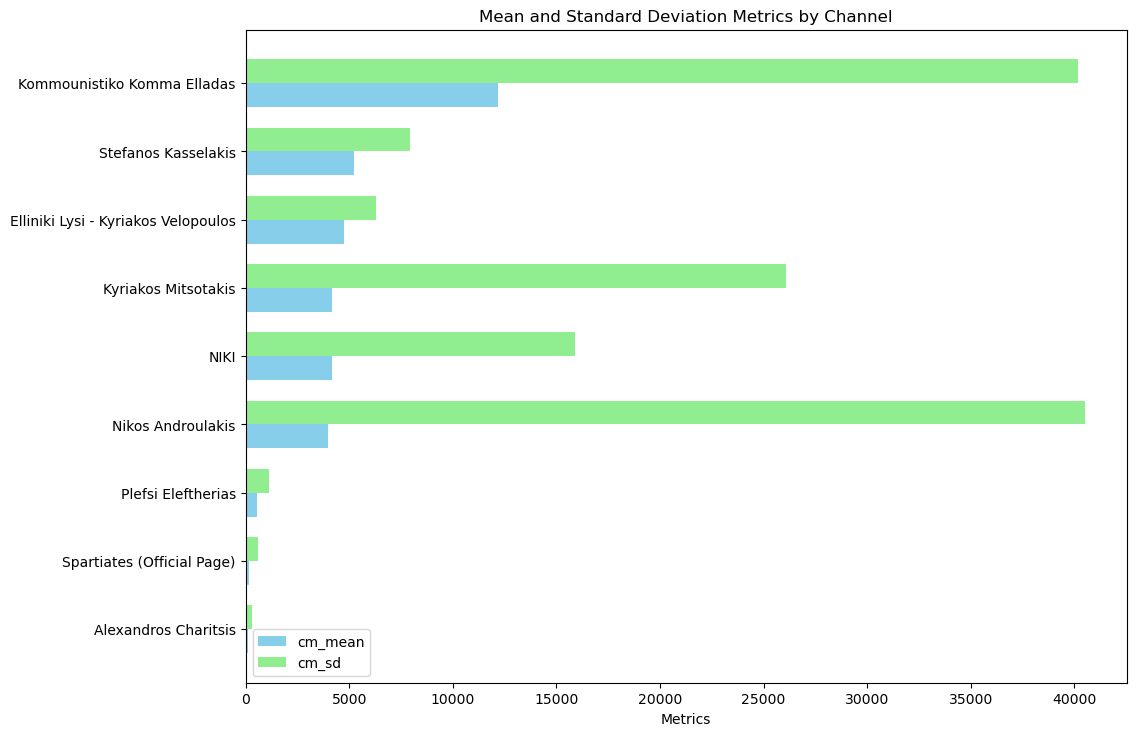

In [221]:
# Set the channel names as the index if they're not already
across_channels.set_index('Channel_name', inplace=True)

# Sort the DataFrame by 'cm_mean' for better visual comparison
df_sorted = across_channels.sort_values('cm_mean')

# Define the position of the bars
channels = df_sorted.index
n = len(channels)  # Number of channels
ind = np.arange(n)  # The x locations for the groups
width = 0.35  # The width of the bars

# Plotting
plt.figure(figsize=(12, 8))

# Bars for cm_mean
mean_bars = plt.barh(ind - width/2, df_sorted['cm_mean'], width, color='skyblue', label='cm_mean')

# Bars for cm_sd
sd_bars = plt.barh(ind + width/2, df_sorted['cm_sd'], width, color='lightgreen', label='cm_sd')

# Add some text for labels, title, and custom x-axis tick labels, etc.
plt.xlabel('Metrics')
plt.title('Mean and Standard Deviation Metrics by Channel')
plt.yticks(ind, channels)
plt.legend()

# Add padding between the channel name and the y-axis for clarity
plt.tight_layout(pad=3)

plt.show()

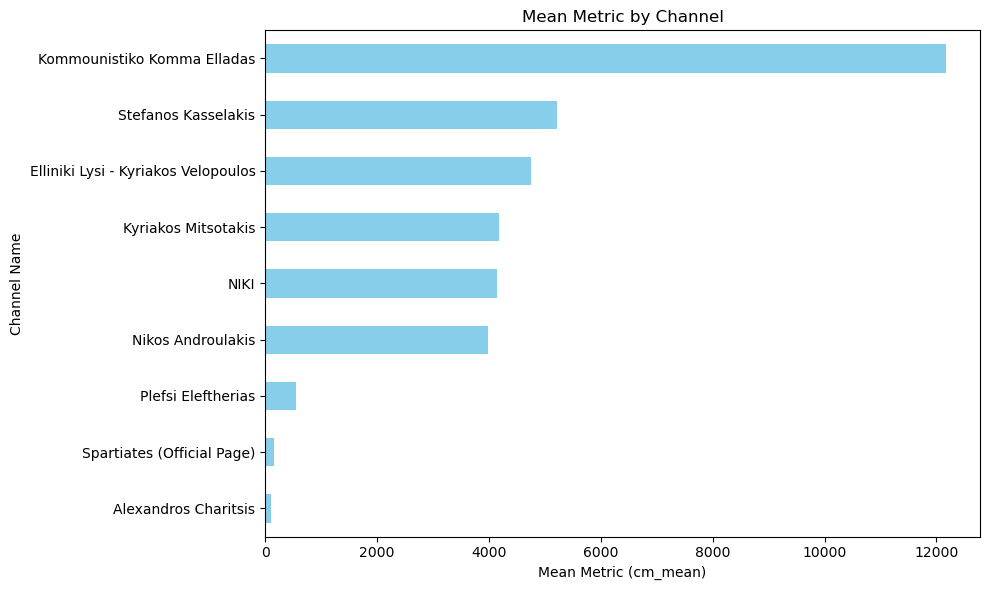

In [205]:
across_channels.set_index('Channel_name', inplace=True)

# Sort the DataFrame by 'cm_mean' to make the chart more readable
df_sorted = across_channels.sort_values('cm_mean')

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
df_sorted['cm_mean'].plot(kind='barh', color='skyblue')  # Horizontal bar chart
plt.title('Metric by Channel')
plt.xlabel('Mean Metric (cm_mean)')
plt.ylabel('Channel Name')
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

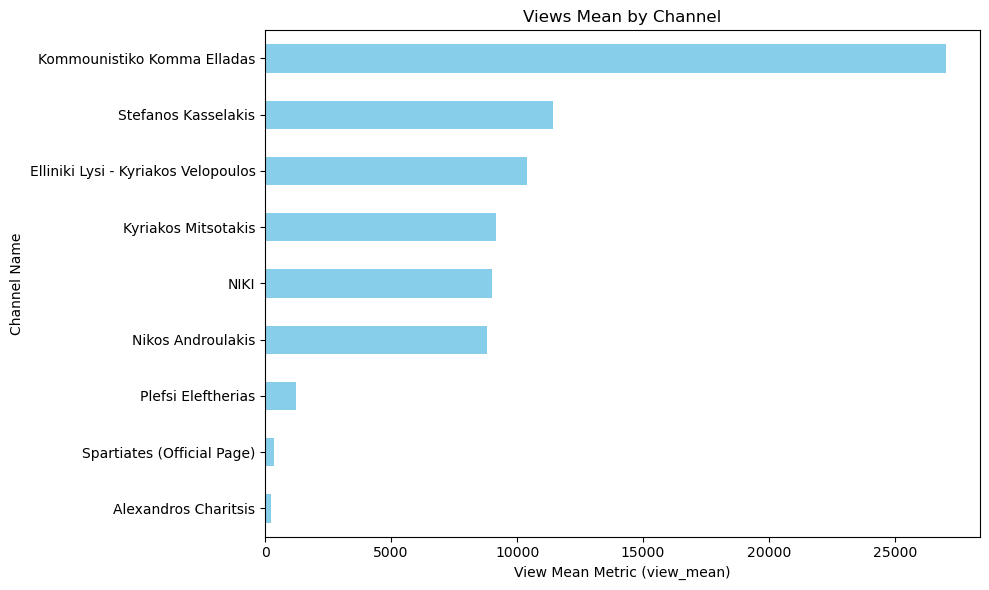

In [226]:
across_channels.set_index('Channel_name', inplace=True)

# Sort the DataFrame by 'cm_mean' to make the chart more readable
df_sorted = across_channels.sort_values('view_mean')

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
df_sorted['view_mean'].plot(kind='barh', color='skyblue')  # Horizontal bar chart
plt.title('Views Mean by Channel')
plt.xlabel('View Mean Metric (view_mean)')
plt.ylabel('Channel Name')
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

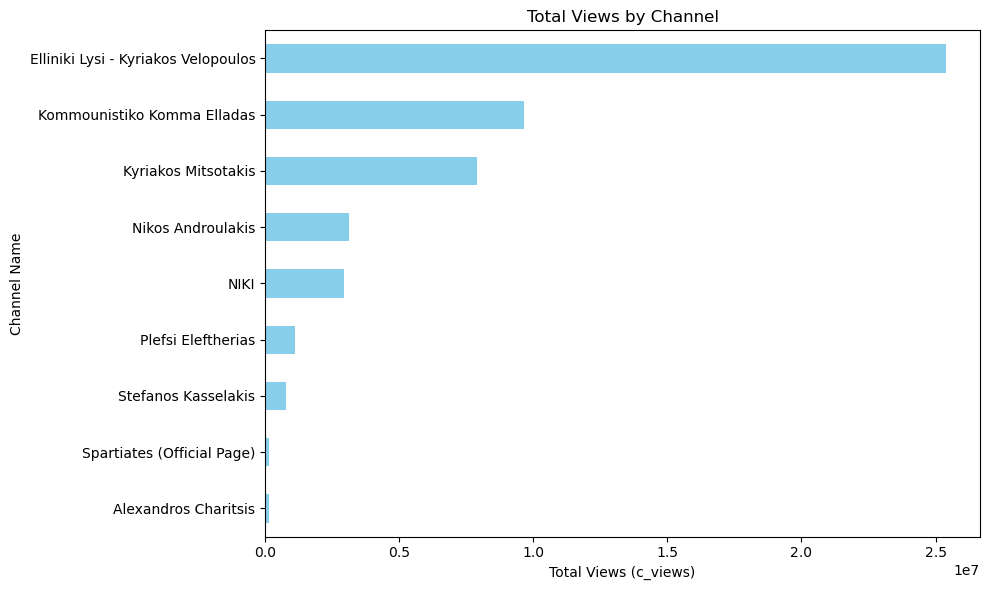

In [229]:
across_channels.set_index('Channel_name', inplace=True)

# Sort the DataFrame by 'cm_mean' to make the chart more readable
df_sorted = across_channels.sort_values('c_views')

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
df_sorted['c_views'].plot(kind='barh', color='skyblue')  # Horizontal bar chart
plt.title('Total Views by Channel')
plt.xlabel('Total Views (c_views)')
plt.ylabel('Channel Name')
plt.tight_layout()  # Adjust layout to make room for the labels
plt.show()

# New DF

In [23]:
dfs = [kke, kyrmits, alexharits, stefkass, nikan, plefzoe, ellykyrvel, spartvasilstig, nikinats]
for df in dfs:
    # Convert 'Published_Date' to datetime, handling errors
    df['Published_Date'] = pd.to_datetime(df['Published_Date'], errors='coerce')

# After conversion, you might want to check for and handle NaT values
# For example, you can drop rows with NaT in 'Published_Date'
dfs = [df.dropna(subset=['Published_Date']) for df in dfs]

# Continue with your monthly counts calculation and combination
monthly_counts = [df.resample('M', on='Published_Date').size() for df in dfs]
combined_df = pd.concat(monthly_counts, axis=1)

# Rename columns to reflect channel names or identifiers
channel_names = ['KKE_DKoutsoumpas', 'ND_KMitsotakis', 'NA-AHaritsis', 'SYRIZA-SKasselakis', 'PASOK-NAndroulakis', 
                 'Plefsi-ZKonstantopoulou', 'EllinikiLysi-KVelopoulos', 'Spartiates-VStigas', 'NIKI-DNatsios']
combined_df.columns = channel_names

# Set the index name
combined_df.index.name = 'Month'

# Show the resulting DataFrame
print(combined_df)

                           KKE_DKoutsoumpas  ND_KMitsotakis  NA-AHaritsis  \
Month                                                                       
2007-06-30 00:00:00+00:00               NaN              13           NaN   
2007-07-31 00:00:00+00:00               NaN               6           NaN   
2007-08-31 00:00:00+00:00               NaN               7           NaN   
2007-09-30 00:00:00+00:00               NaN              10           NaN   
2007-10-31 00:00:00+00:00               NaN               0           NaN   
...                                     ...             ...           ...   
2023-09-30 00:00:00+00:00               0.0              23          13.0   
2023-10-31 00:00:00+00:00               3.0              29           1.0   
2023-11-30 00:00:00+00:00               0.0              11          11.0   
2023-12-31 00:00:00+00:00               1.0              17          17.0   
2024-01-31 00:00:00+00:00               NaN              17          19.0   

In [24]:
uploads_per_month_df = combined_df

In [25]:
uploads_per_month_df

KKE_DKoutsoumpas  ND_KMitsotakis  NA-AHaritsis  \
Month                                                                       
2007-06-30 00:00:00+00:00               NaN              13           NaN   
2007-07-31 00:00:00+00:00               NaN               6           NaN   
2007-08-31 00:00:00+00:00               NaN               7           NaN   
2007-09-30 00:00:00+00:00               NaN              10           NaN   
2007-10-31 00:00:00+00:00               NaN               0           NaN   
...                                     ...             ...           ...   
2023-09-30 00:00:00+00:00               0.0              23          13.0   
2023-10-31 00:00:00+00:00               3.0              29           1.0   
2023-11-30 00:00:00+00:00               0.0              11          11.0   
2023-12-31 00:00:00+00:00               1.0              17          17.0   
2024-01-31 00:00:00+00:00               NaN              17          19.0   

                           SYRIZA-SKasselakis  PASOK-NAndroulakis  \
Month                                                               
2007-06-30 00:00:00+00:00                 NaN                 NaN   
2007-07-31 00:00:00+00:00                 NaN                 NaN   
2007-08-31 00:00:00+00:00                 NaN                 NaN   
2007-09-30 00:00:00+00:00                 NaN                 NaN   
2007-10-31 00:00:00+00:00                 NaN                 NaN   
...                                       ...                 ...   
2023-09-30 00:00:00+00:00                17.0                 9.0   
2023-10-31 00:00:00+00:00                12.0                11.0   
2023-11-30 00:00:00+00:00                10.0                15.0   
2023-12-31 00:00:00+00:00                11.0                17.0   
2024-01-31 00:00:00+00:00                 4.0                 7.0   

                           Plefsi-ZKonstantopoulou  EllinikiLysi-KVelopoulos  \
Month                                                                          
2007-06-30 00:00:00+00:00                      NaN                       NaN   
2007-07-31 00:00:00+00:00                      NaN                       NaN   
2007-08-31 00:00:00+00:00                      NaN                       NaN   
2007-09-30 00:00:00+00:00                      NaN                       NaN   
2007-10-31 00:00:00+00:00                      NaN                       NaN   
...                                            ...                       ...   
2023-09-30 00:00:00+00:00                    102.0                      58.0   
2023-10-31 00:00:00+00:00                     73.0                      21.0   
2023-11-30 00:00:00+00:00                    106.0                      27.0   
2023-12-31 00:00:00+00:00                     45.0                      23.0   
2024-01-31 00:00:00+00:00                      NaN                      48.0   

                           Spartiates-VStigas  NIKI-DNatsios  
Month                                                         
2007-06-30 00:00:00+00:00                 NaN            NaN  
2007-07-31 00:00:00+00:00                 NaN            NaN  
2007-08-31 00:00:00+00:00                 NaN            NaN  
2007-09-30 00:00:00+00:00                 NaN            NaN  
2007-10-31 00:00:00+00:00                 NaN            NaN  
...                                       ...            ...  
2023-09-30 00:00:00+00:00                46.0           36.0  
2023-10-31 00:00:00+00:00                64.0           29.0  
2023-11-30 00:00:00+00:00                86.0           56.0  
2023-12-31 00:00:00+00:00                92.0           56.0  
2024-01-31 00:00:00+00:00                74.0           40.0  

[200 rows x 9 columns]

In [26]:
uploads_per_month_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 200 entries, 2007-06-30 00:00:00+00:00 to 2024-01-31 00:00:00+00:00
Freq: M
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   KKE_DKoutsoumpas          164 non-null    float64
 1   ND_KMitsotakis            200 non-null    int64  
 2   NA-AHaritsis              69 non-null     float64
 3   SYRIZA-SKasselakis        6 non-null      float64
 4   PASOK-NAndroulakis        110 non-null    float64
 5   Plefsi-ZKonstantopoulou   28 non-null     float64
 6   EllinikiLysi-KVelopoulos  85 non-null     float64
 7   Spartiates-VStigas        68 non-null     float64
 8   NIKI-DNatsios             25 non-null     float64
dtypes: float64(8), int64(1)
memory usage: 23.7 KB


In [8]:
uploads_per_month = pd.read_csv('uploads_per_month.csv')

In [11]:
uploads_per_month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     200 non-null    object 
 1   KKE_DKoutsoumpas          164 non-null    float64
 2   ND_KMitsotakis            200 non-null    int64  
 3   NA-AHaritsis              69 non-null     float64
 4   SYRIZA-SKasselakis        6 non-null      float64
 5   PASOK-NAndroulakis        110 non-null    float64
 6   Plefsi-ZKonstantopoulou   28 non-null     float64
 7   EllinikiLysi-KVelopoulos  85 non-null     float64
 8   Spartiates-VStigas        68 non-null     float64
 9   NIKI-DNatsios             25 non-null     float64
dtypes: float64(8), int64(1), object(1)
memory usage: 15.8+ KB


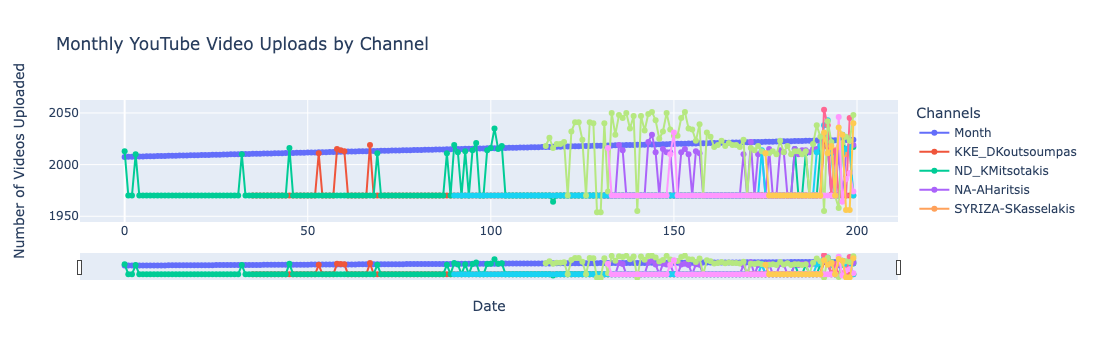

In [9]:
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Assuming your DataFrame is named combined_df

# Create a figure with make_subplots
fig = make_subplots(specs=[[{"secondary_y": False}]])

# Add a line for each channel
for column in uploads_per_month.columns:
    fig.add_trace(go.Scatter(x=uploads_per_month.index, y=uploads_per_month[column], mode='lines+markers', name=column))

fig.update_layout(
    title='Monthly YouTube Video Uploads by Channel',
    xaxis_title='Date',
    yaxis_title='Number of Videos Uploaded',
    legend_title='Channels',
    hovermode='x'
)

fig.update_xaxes(rangeslider_visible=True)  # This adds a range slider below the x-axis

fig.show()

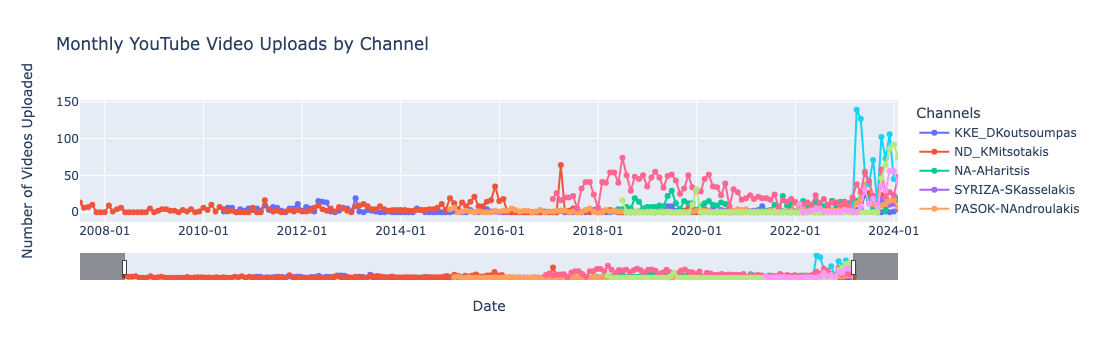

In [15]:

# Convert 'Month' column to datetime format
uploads_per_month['Month'] = pd.to_datetime(uploads_per_month['Month'])

# Create a figure with make_subplots
fig = go.Figure()

# Add a line for each channel, using the 'Month' column for the x-axis
for column in uploads_per_month.columns[1:]:  # Skip the first column ('Month') for plotting
    fig.add_trace(go.Scatter(x=uploads_per_month['Month'], y=uploads_per_month[column], mode='lines+markers', name=column))

fig.update_layout(
    title='Monthly YouTube Video Uploads by Channel',
    xaxis_title='Date',
    yaxis_title='Number of Videos Uploaded',
    legend_title='Channels',
    hovermode='x'
)

fig.update_xaxes(
    tickformat='%Y-%m',  # Format the x-axis labels as 'Year-Month'
    rangeslider_visible=True,  # Adds a range slider below the x-axis
    range=['2007-07-01', '2024-01-31']  # Set the specific range for x-axis
)

fig.show()


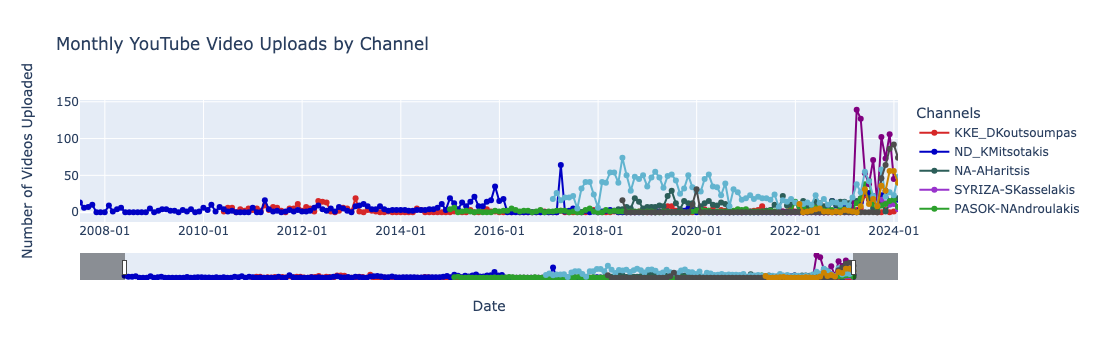

In [18]:
# Convert 'Month' column to datetime format
uploads_per_month['Month'] = pd.to_datetime(uploads_per_month['Month'])

# Define a list of colors for each channel
colors = [
    '#d62728',  # Red
    '#0000c4',  # Blue
    '#2c5e59',  # Darkcyan
    '#9933cc',  # Purple
    '#2ca02c',  # Green
    '#800080',  # Purple2
    '#62b4cf',  # LightBlue
    '#4c4c4c',  # Black
    '#cc8400',  # Orange
]

# Create a figure
fig = go.Figure()

# Add a line for each channel, using the 'Month' column for the x-axis
for column, color in zip(uploads_per_month.columns[1:], colors):  # Skip the first column ('Month') for plotting
    fig.add_trace(go.Scatter(x=uploads_per_month['Month'], y=uploads_per_month[column], mode='lines+markers', name=column, line=dict(color=color)))

fig.update_layout(
    title='Monthly YouTube Video Uploads by Channel',
    xaxis_title='Date',
    yaxis_title='Number of Videos Uploaded',
    legend_title='Channels',
    hovermode='x'
)

# Set specific range for x-axis and update format
fig.update_xaxes(
    tickformat='%Y-%m',  # Format the x-axis labels as 'Year-Month'
    rangeslider_visible=True,  # Adds a range slider below the x-axis
    range=['2007-07-01', '2024-01-31']  # Set the specific range for x-axis
)

fig.show()

In [20]:
from plotly.offline import plot

In [21]:
plot(fig, filename='youtube_channel_uploads.html', auto_open=True)

'youtube_channel_uploads.html'